 # 1) Importion des Libraries

In [1]:
from collections import Counter
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import itertools

from sklearn.preprocessing import Imputer

# visualisation des données

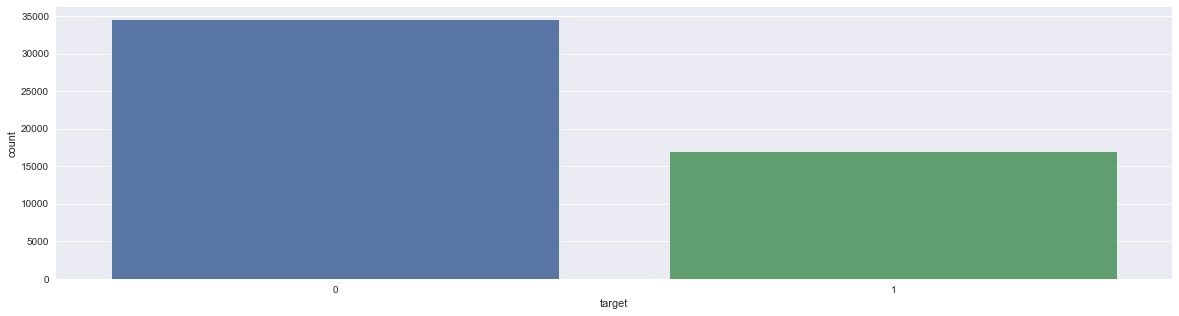

In [2]:
# get training & test csv files as a DataFrame
train_df = pd.read_csv("C:/Users/moi/Downloads/master esilv/Python/train.csv" )
test_df  = pd.read_csv("C:/Users/moi/Downloads/master esilv/Python/test.csv")
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
sns.countplot(x='target', data=train_df, ax=axis1, order=[0,1])
plt.show()


<span style="color:red">
Graphiques Illisibles
</span>

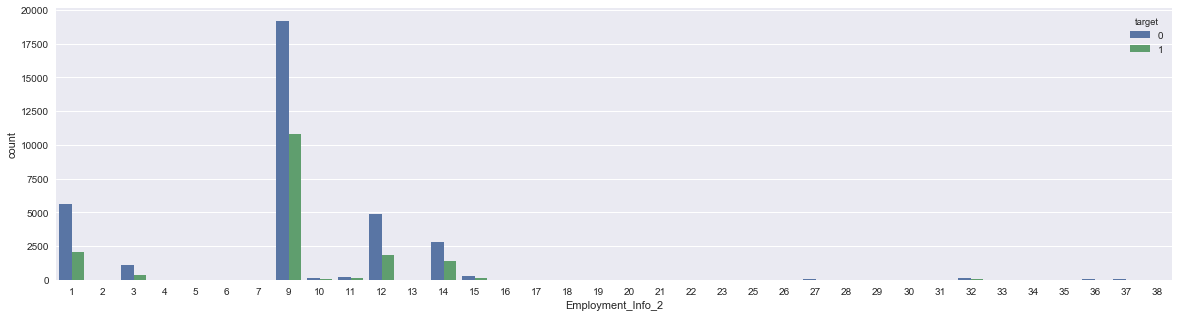

In [3]:
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
sns.countplot(x='Employment_Info_2', hue="target", data=train_df, ax=axis1, hue_order=[0,1])
plt.show()

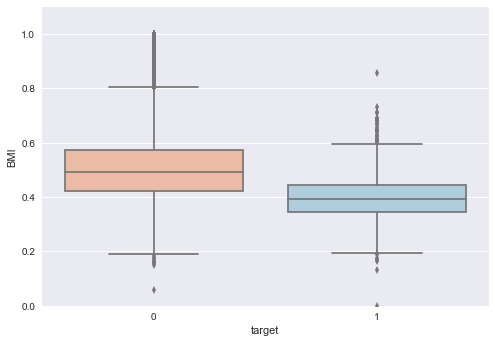

In [4]:
ax = sns.boxplot(x="target", y="BMI", data=train_df, order=[0,1], palette="RdBu")
ax.set(ylim=(0, 1.1))
plt.show()

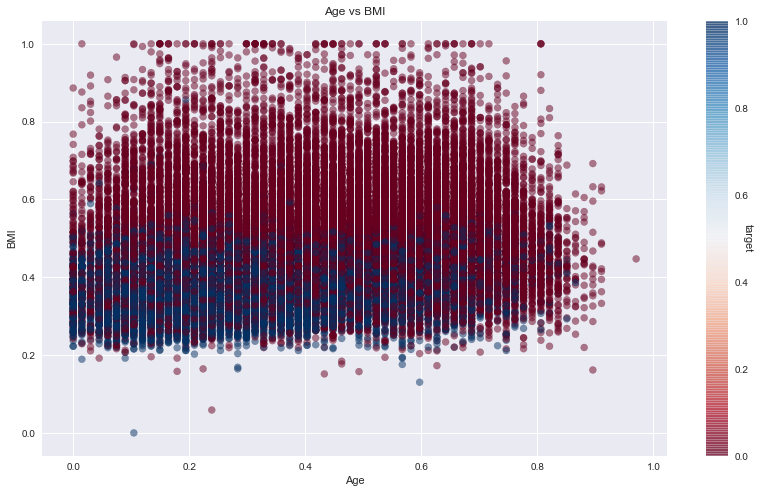

In [5]:
fig, ax = plt.subplots(1,1,figsize=(14,8))
cm = plt.cm.get_cmap('RdBu')
ax = plt.scatter(train_df["Ins_Age"], train_df["BMI"], c=train_df["target"], alpha=0.5, cmap=cm)
plt.xlim=(0, 1.0)
plt.ylim=(0, 1.0)
plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
cbar=plt.colorbar(ax)
cbar.ax.set_ylabel('target', rotation=270)
plt.show()

In [6]:
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
sns.countplot(x='InsuredInfo_6', hue="target", data=train_df, ax=axis1, hue_order=[0,1], palette="RdBu")

<span style="color:red">
Quelles conclusion de ces graphiques ? 
</span>

# 2) Importion des données

In [7]:
# J'ai divisé les données d'entrée en 4 classes de variables comme les descriptions de données parce que les manières de prétraitement sont différentes.
#catégorielle, continue, discrete, fictive


<span style="color:red">
Ok, très bien. A noter que vous avez une fonction pandas qui vous permet de trouver les types de colonnes : pandas.DataFrame.select_dtypes
</span>

In [8]:
path = "C:/Users/moi/Downloads/master esilv/Python"
#assert(os.path.isfile(path))

TRAIN_DATA = pd.read_csv("C:/Users/moi/Downloads/master esilv/Python/train.csv")
TEST_DATA = pd.read_csv("C:/Users/moi/Downloads/master esilv/Python/test.csv")

CATEGORICAL_COLUMNS = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]
CONTINUOUS_COLUMNS = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
DISCRETE_COLUMNS = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]
DUMMY_COLUMNS = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

categorical_data = pd.concat([TRAIN_DATA[CATEGORICAL_COLUMNS], TEST_DATA[CATEGORICAL_COLUMNS]])
continuous_data = pd.concat([TRAIN_DATA[CONTINUOUS_COLUMNS], TEST_DATA[CONTINUOUS_COLUMNS]])
discrete_data = pd.concat([TRAIN_DATA[DISCRETE_COLUMNS], TEST_DATA[DISCRETE_COLUMNS]])
dummy_data = pd.concat([TRAIN_DATA[DUMMY_COLUMNS], TEST_DATA[DUMMY_COLUMNS]])


# 3 Prétraitement des données

# 3.1 Données catégorielle

-Les colonnes 60 suivantes des colonnes 128 représentent des données catégorielle:

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, 
Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, 
InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, 
Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, 
Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, 
Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, 
Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, 
Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, 
Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, 
Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41



<span style="color:red">
Très bel usage d'une fonction :)
</span>


In [ ]:

# Affichage des données catégorielle 

def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(categorical_data)

 

# 3.2 Données continues

Les 13 colonnes suivantes représentent des données continues:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

<span style="color:red">
On aurait pu diviser les deuxx fonctions en deux parties, en créant juste une fonction pour la partie de la boucle, et une fonction pour la partie de la création de la figure.
</span>

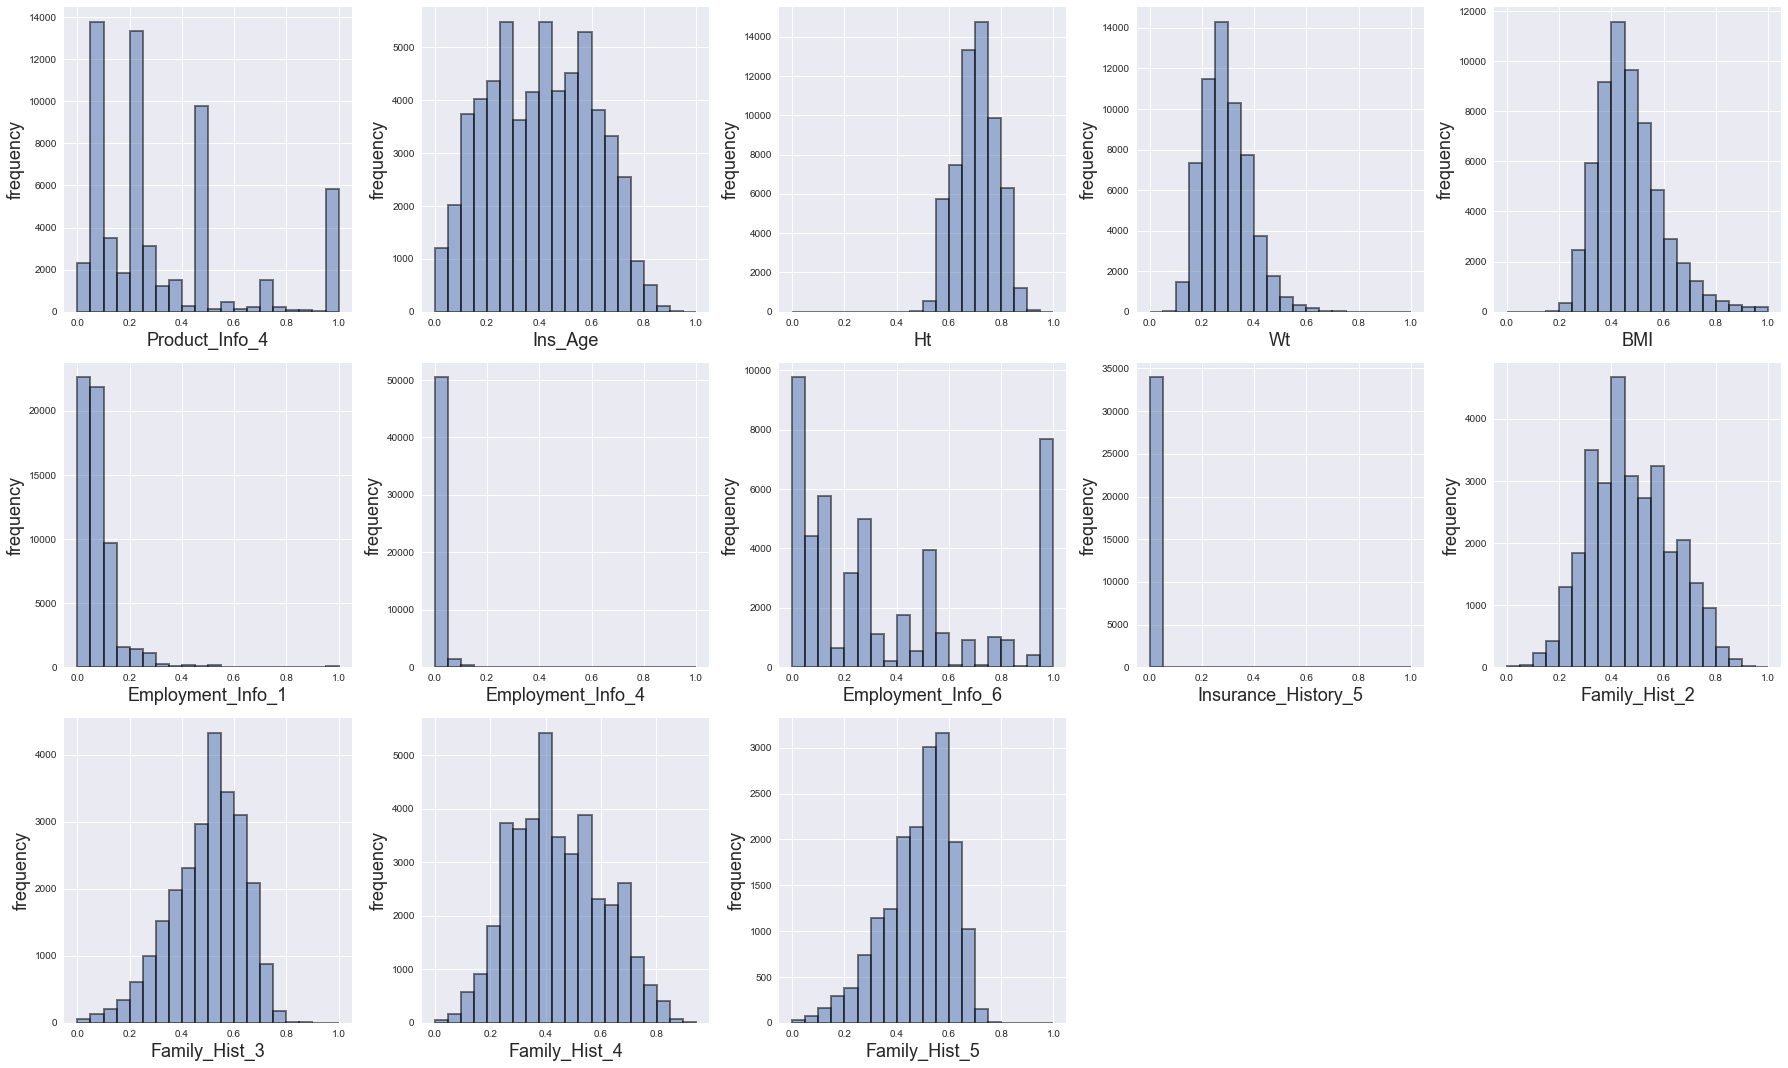

In [10]:
# display continuous data

def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(continuous_data)

Parce que certaines distributions sont faussées, j'ai appliqué Box-Cox.
En outre, chaque colonne est normalisée et chaque valeur manquante prend 0.

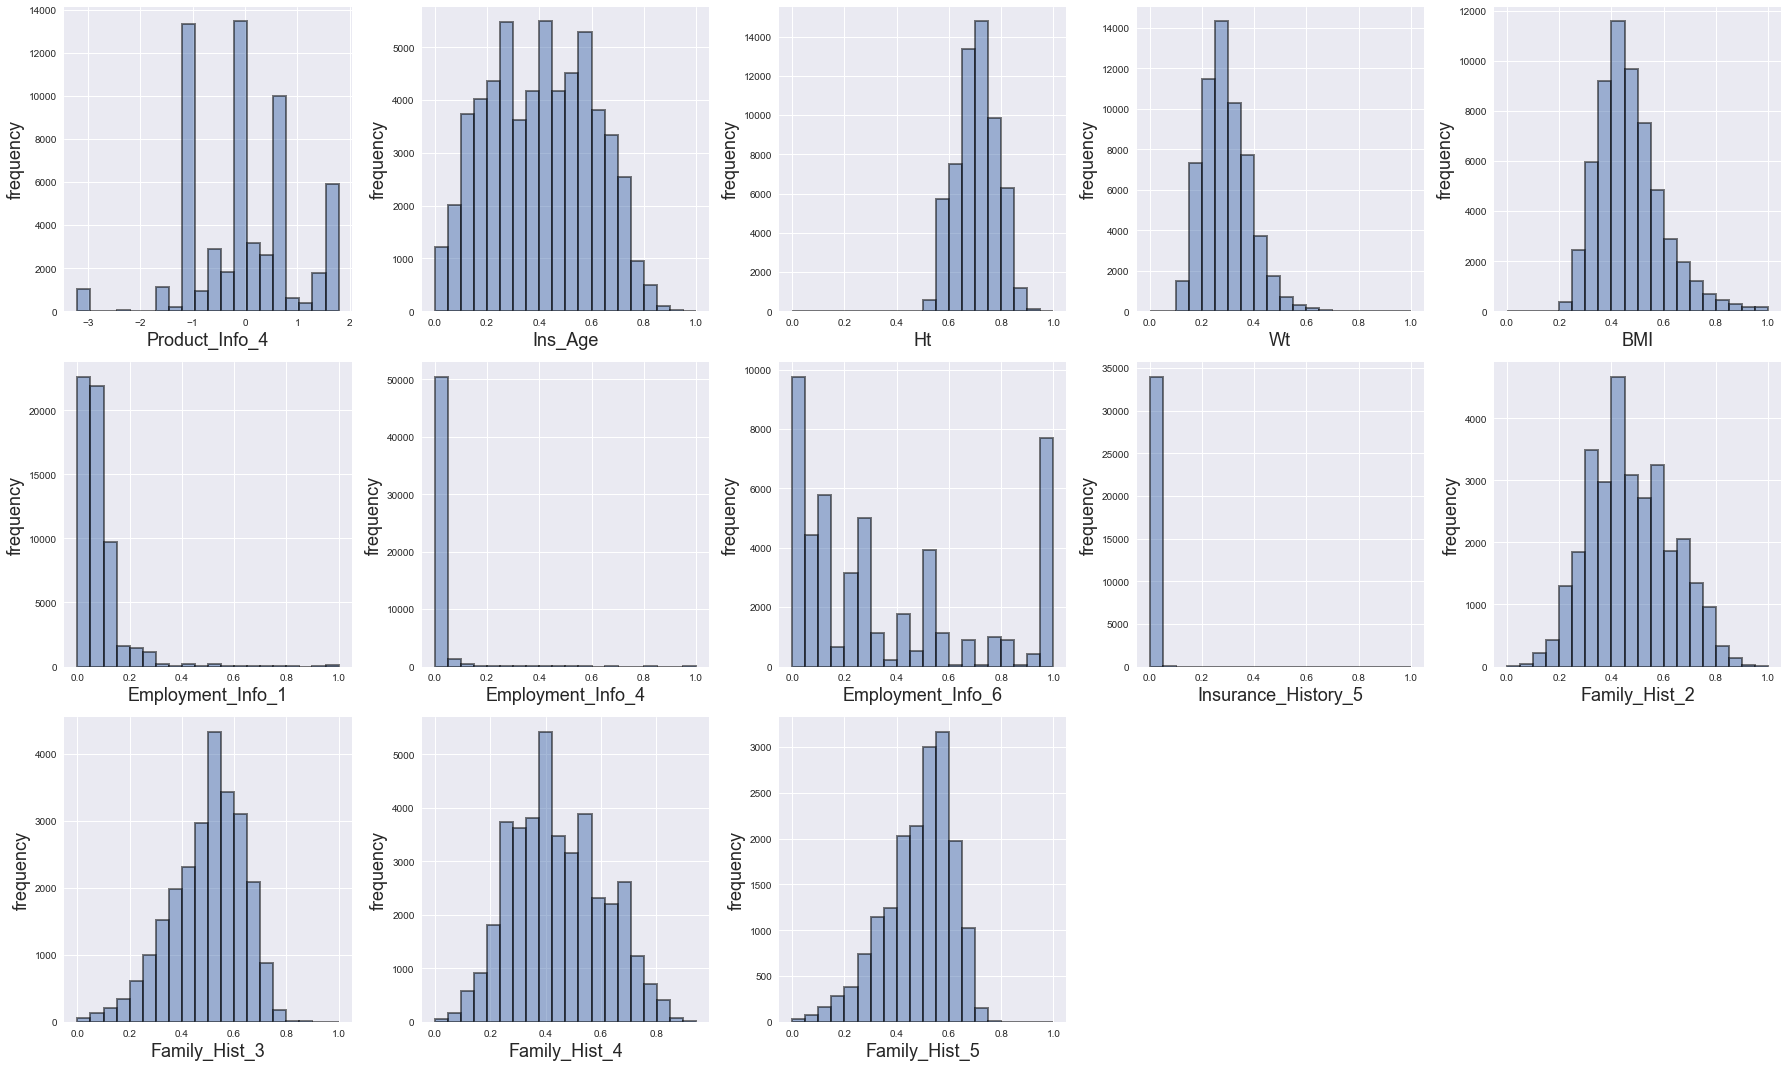

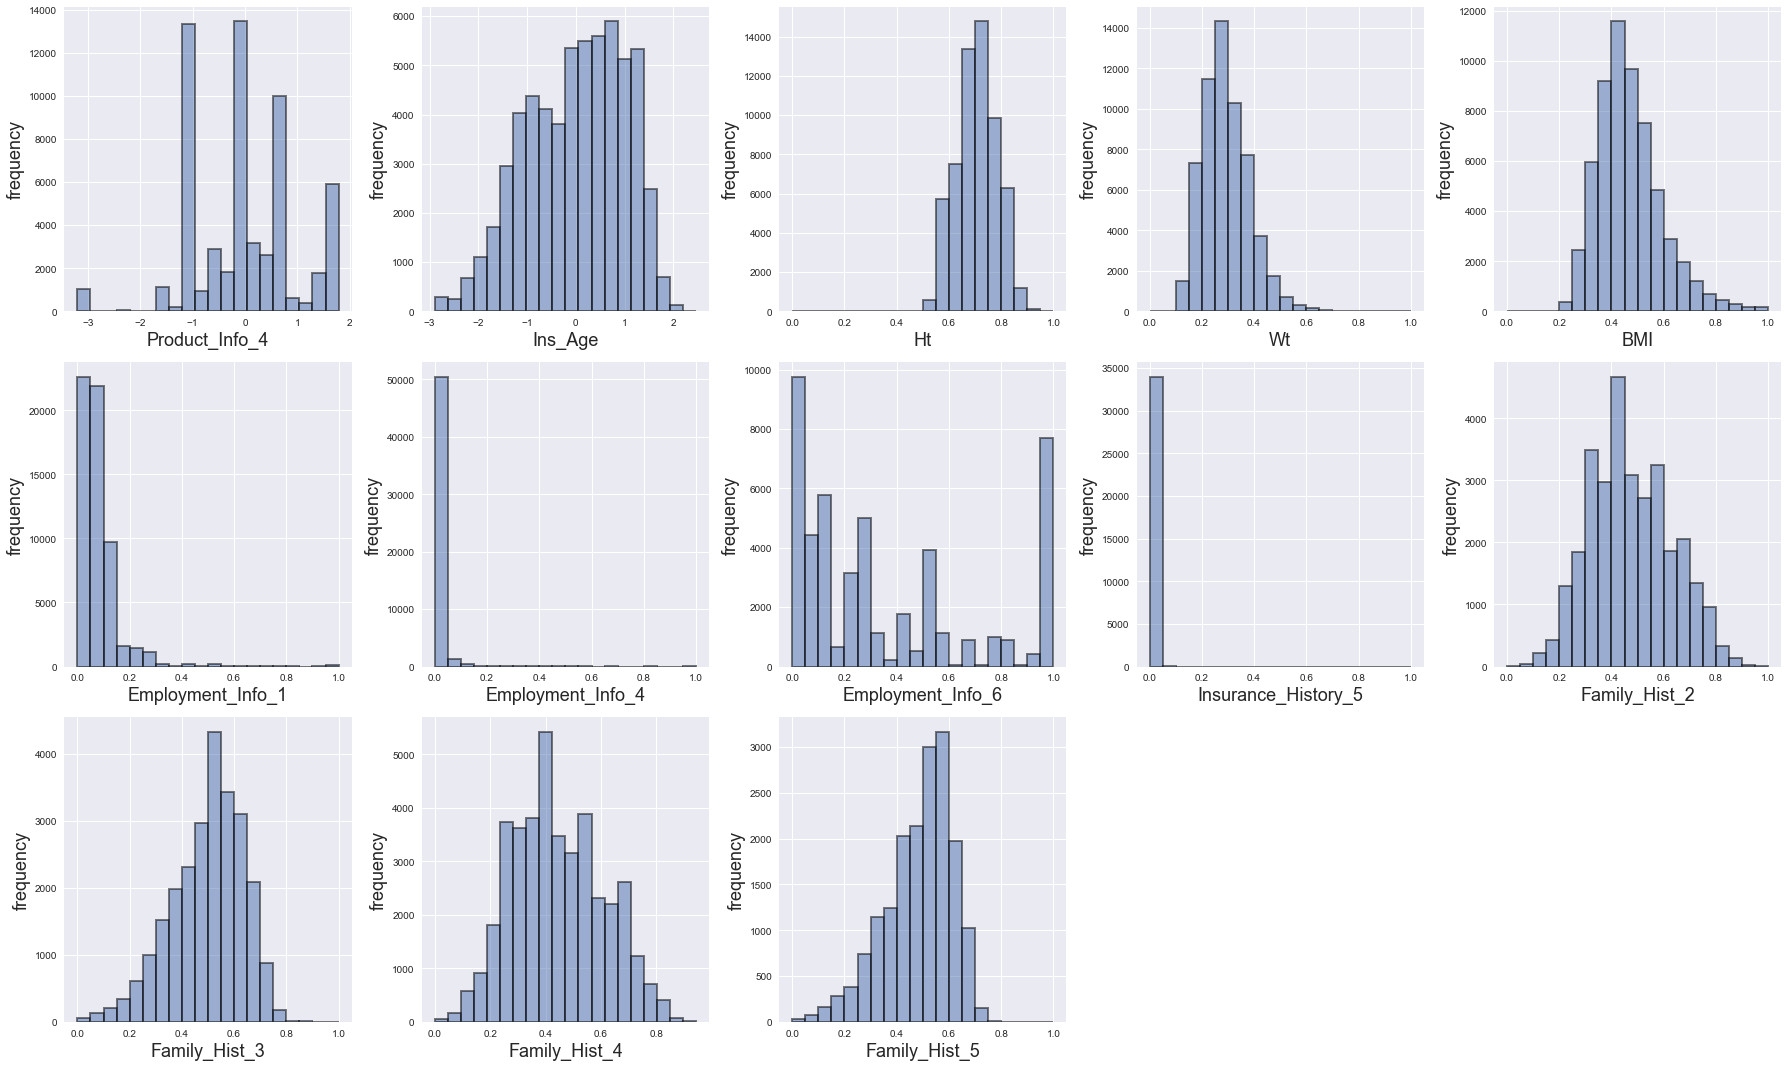

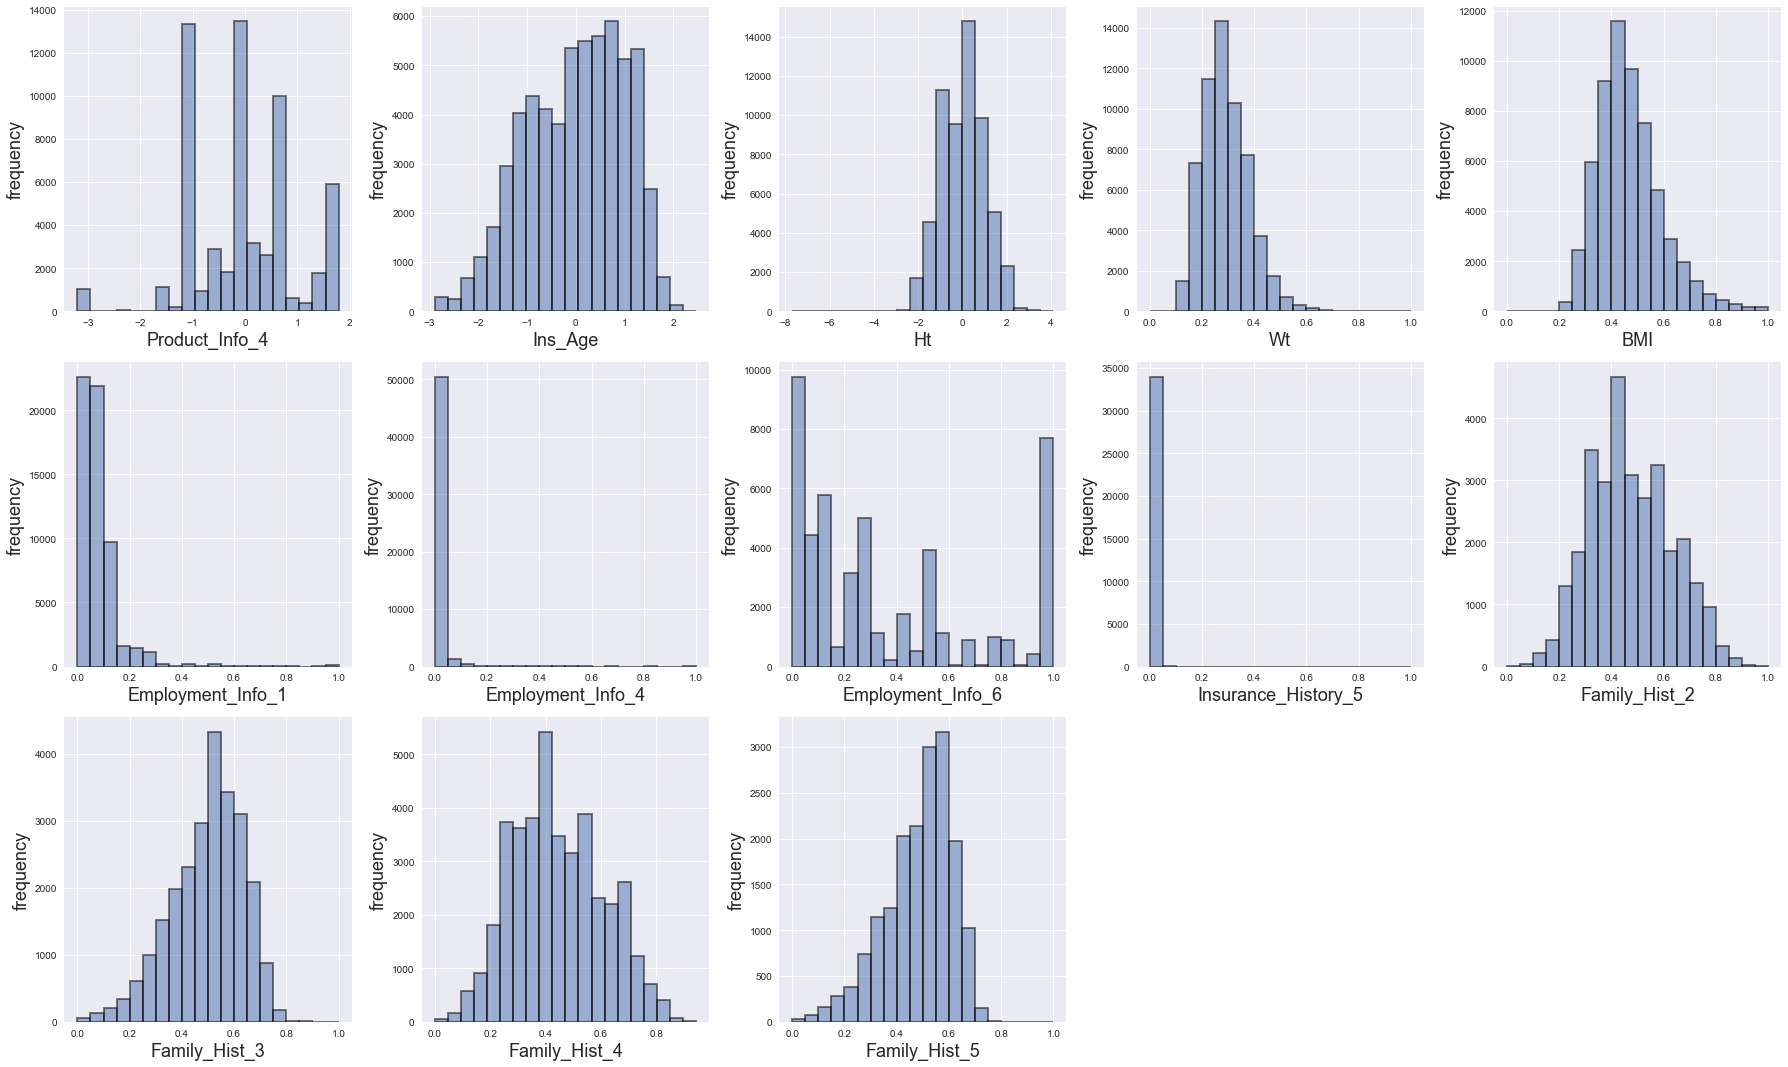

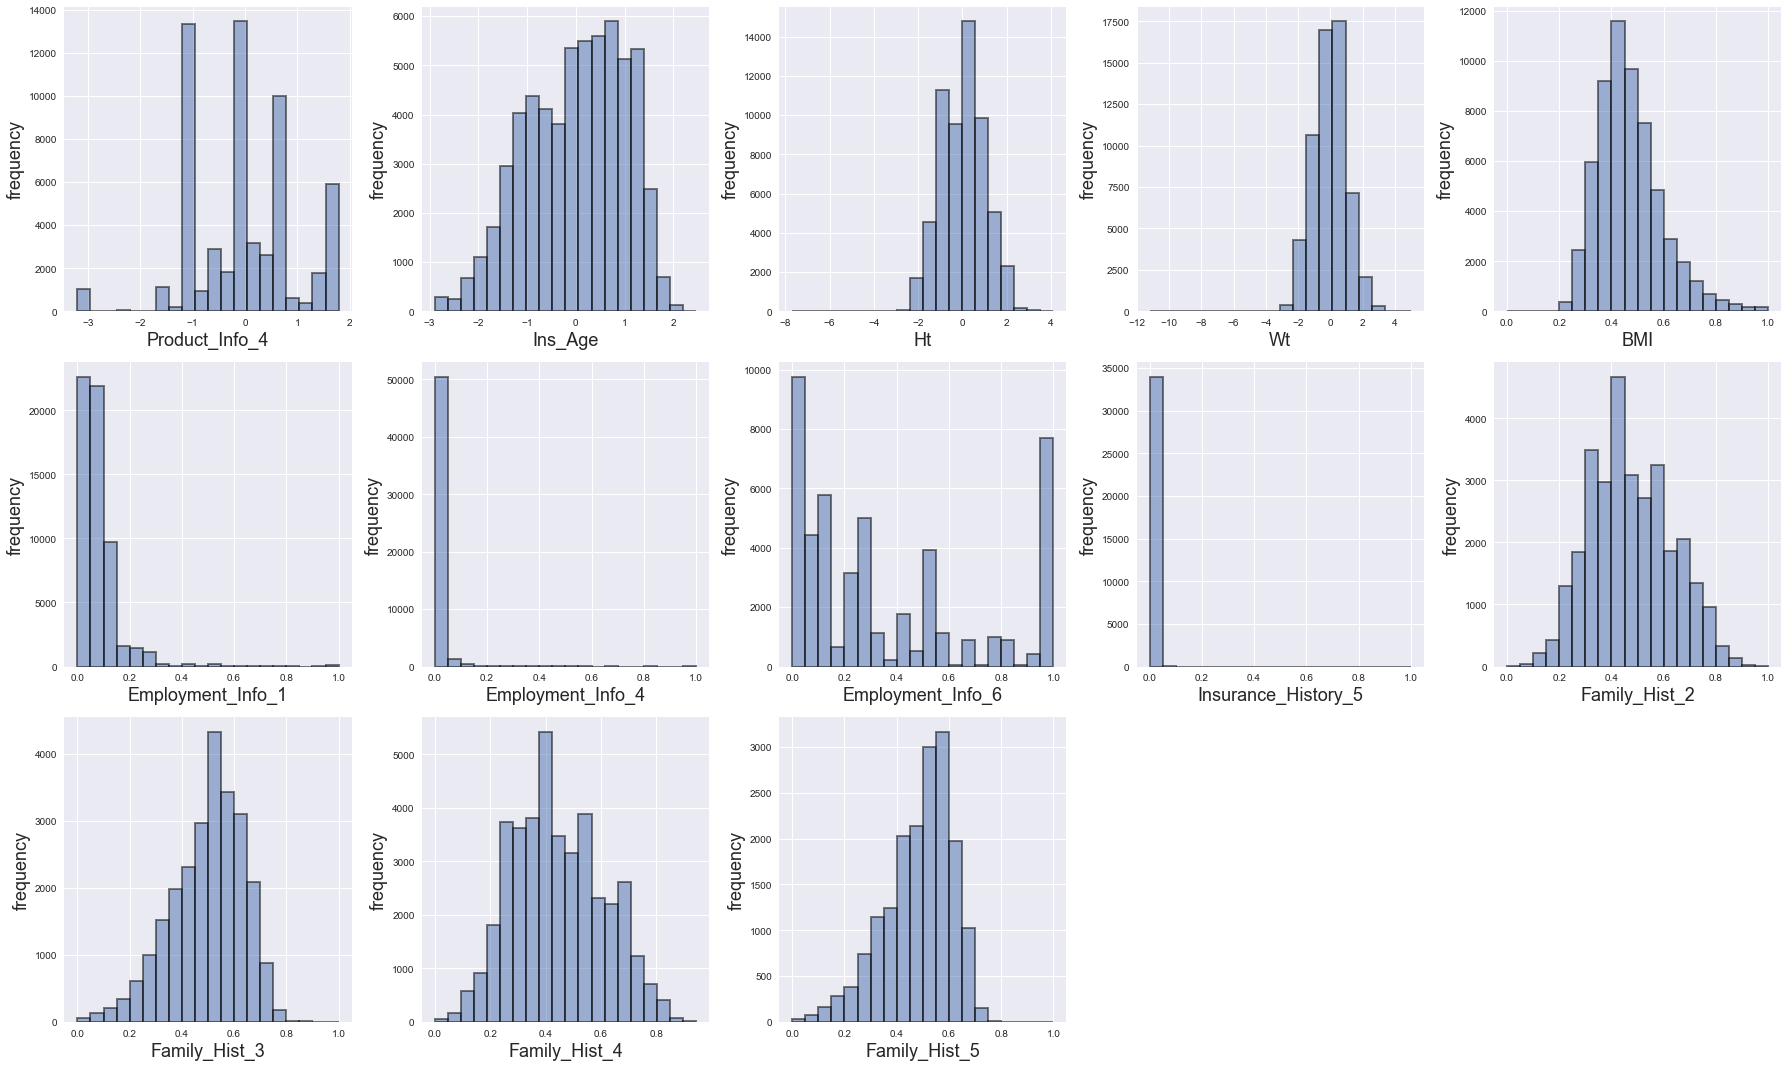

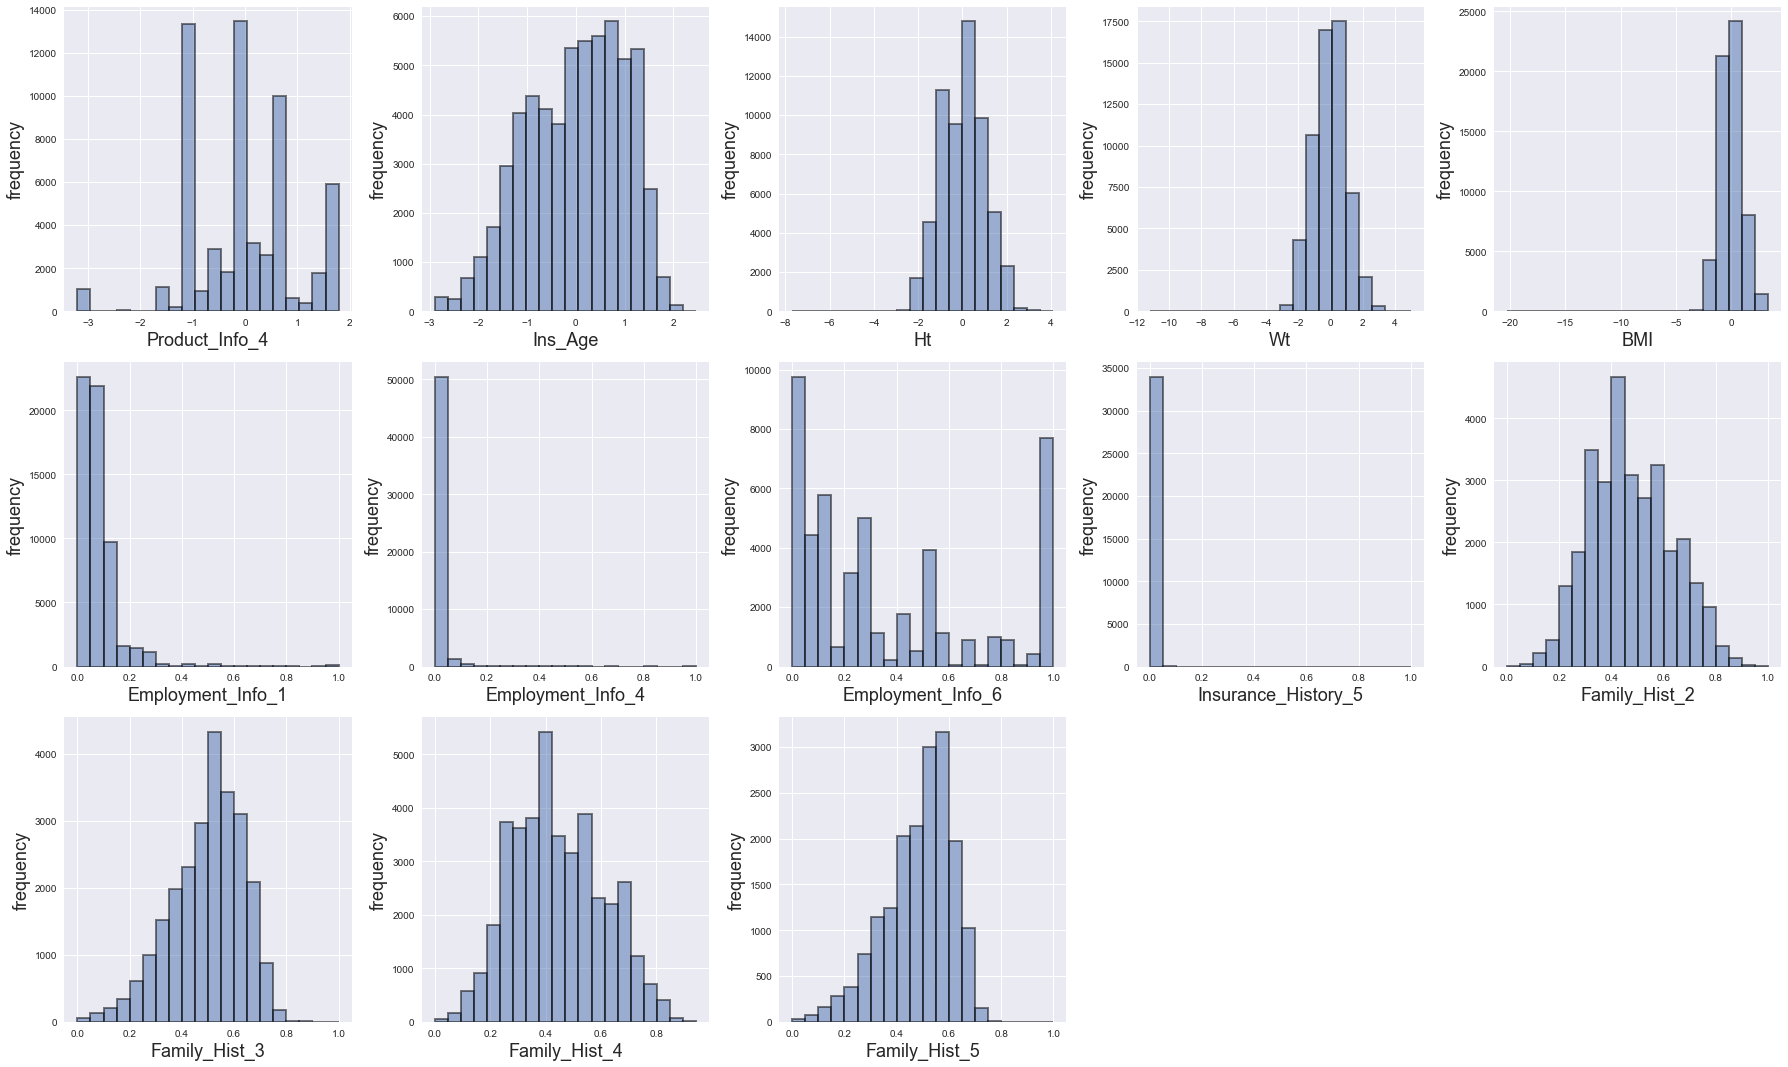

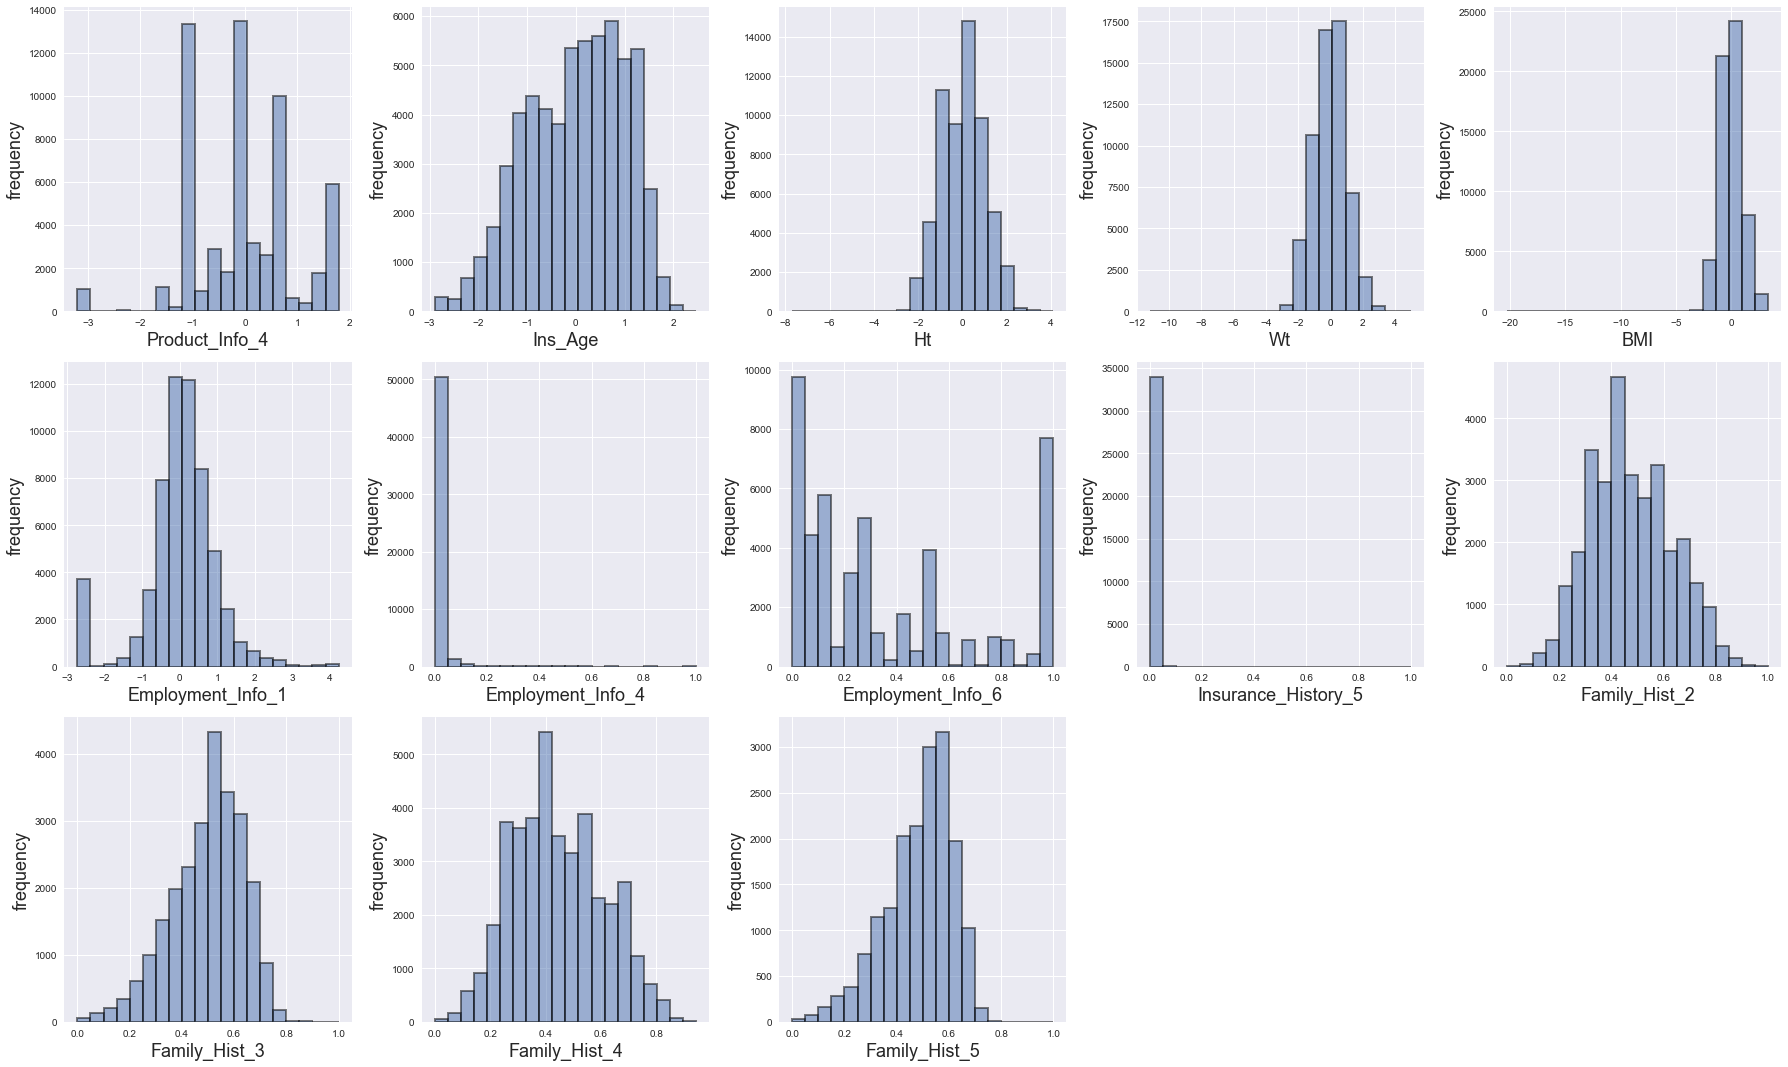

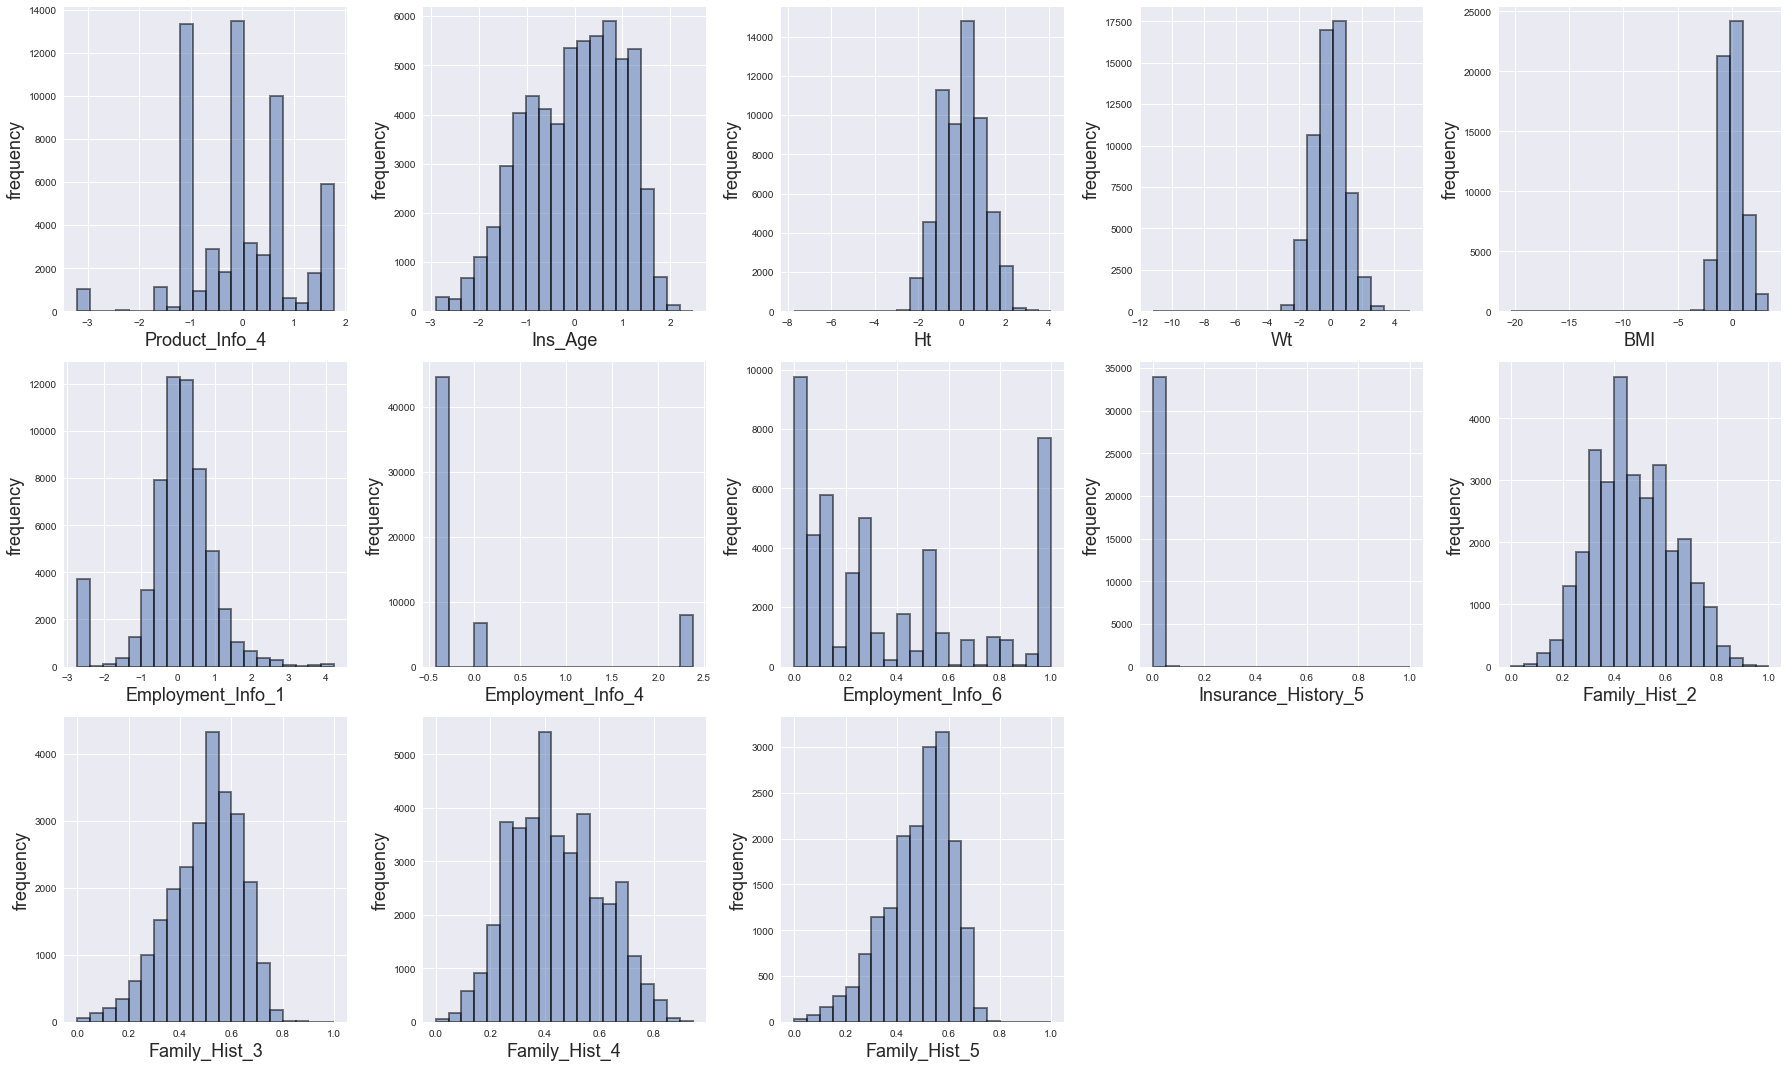

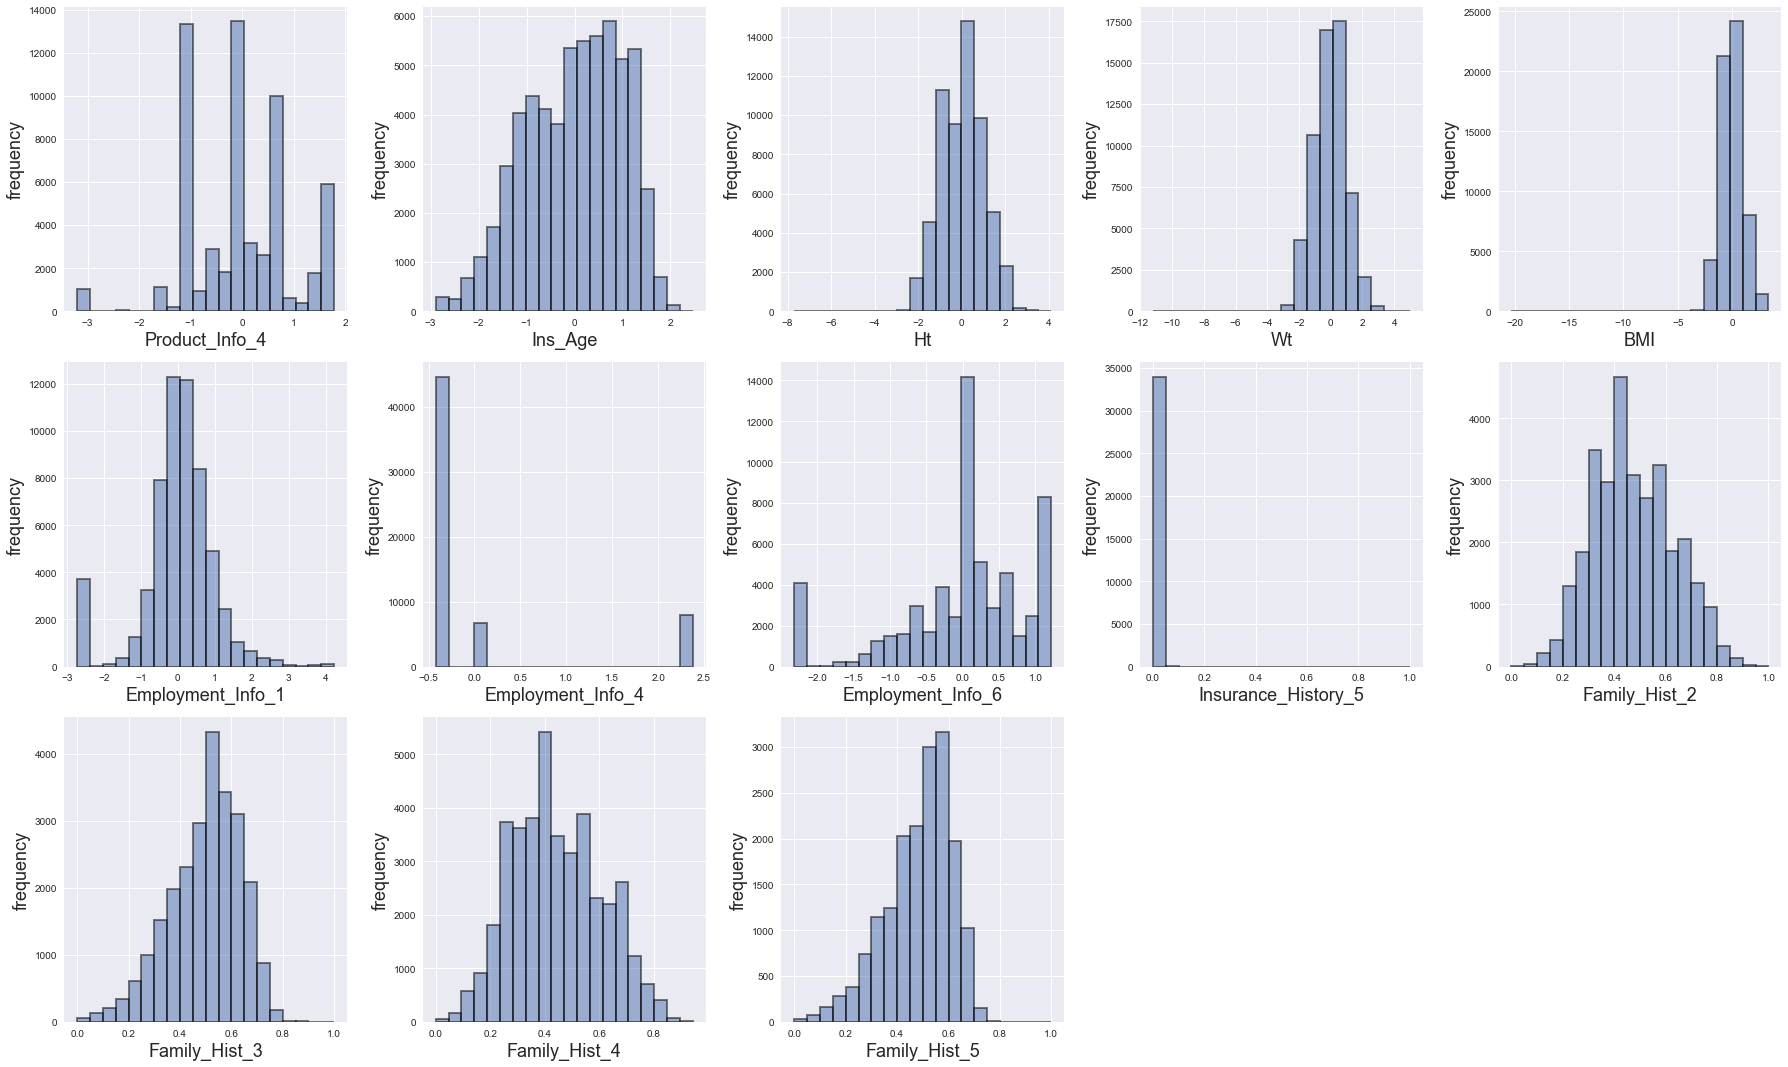

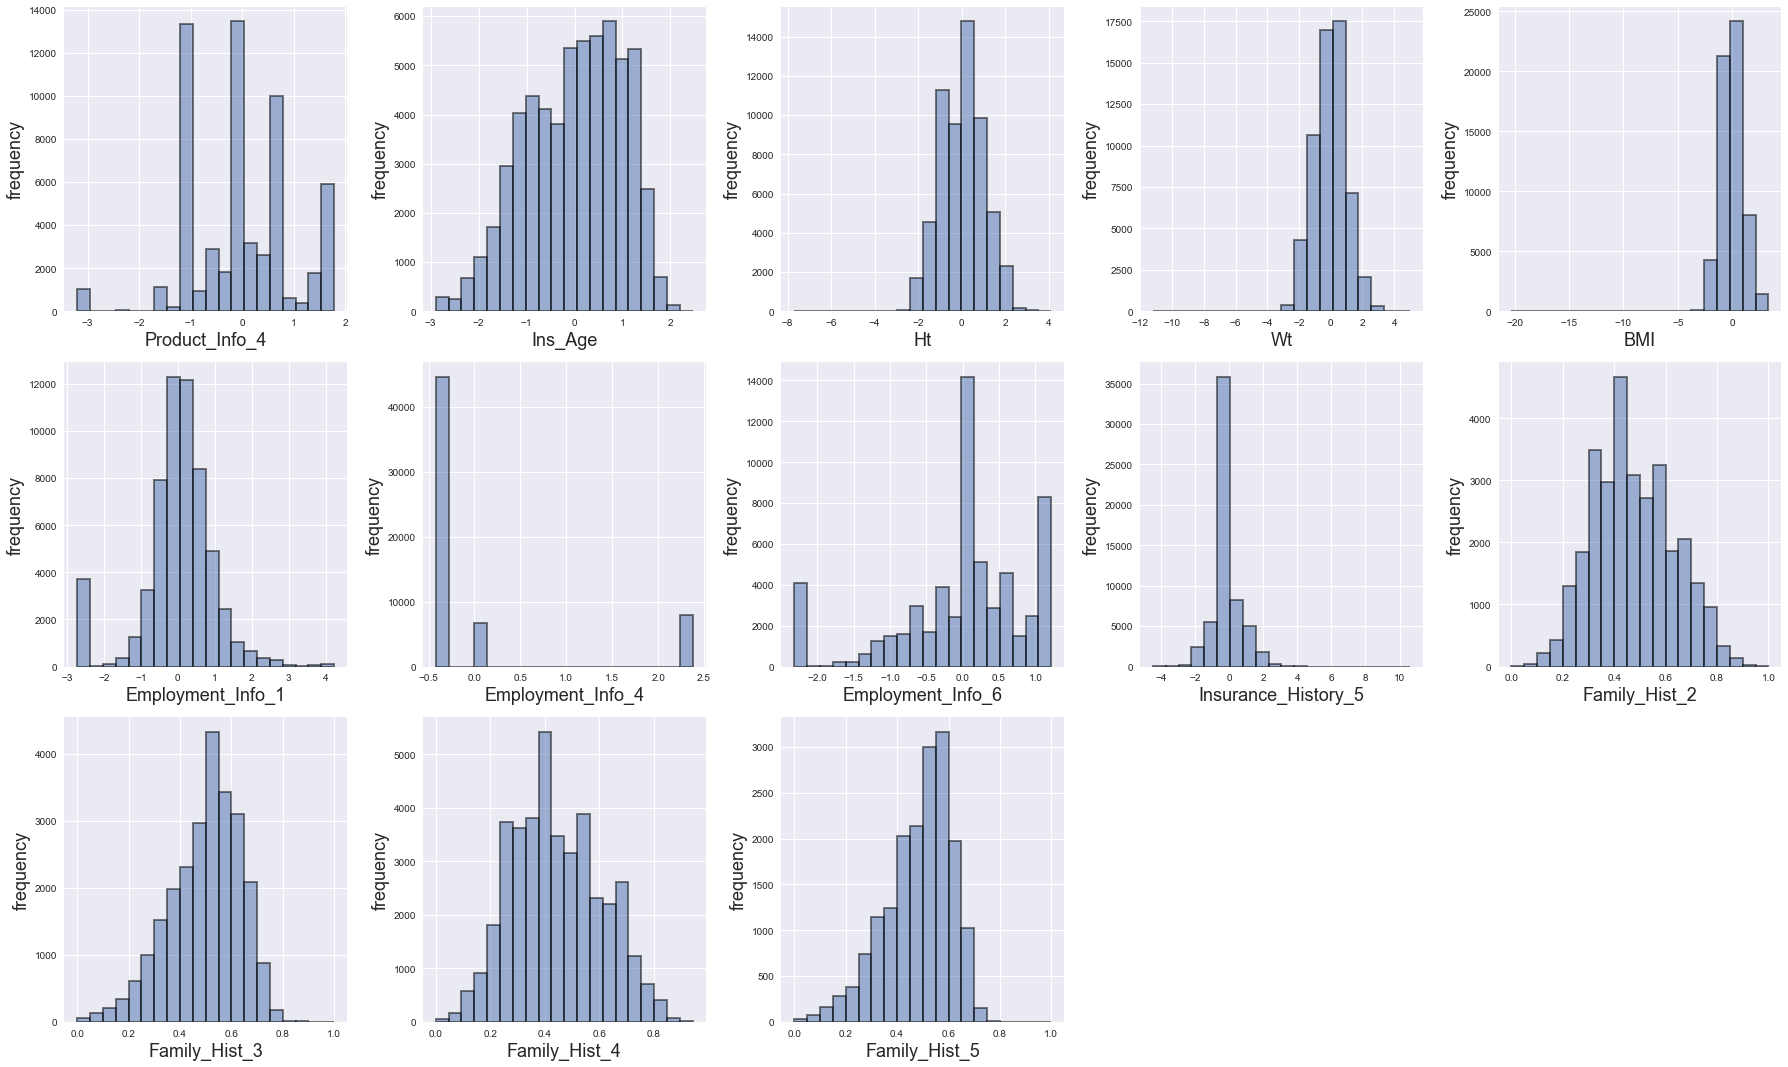

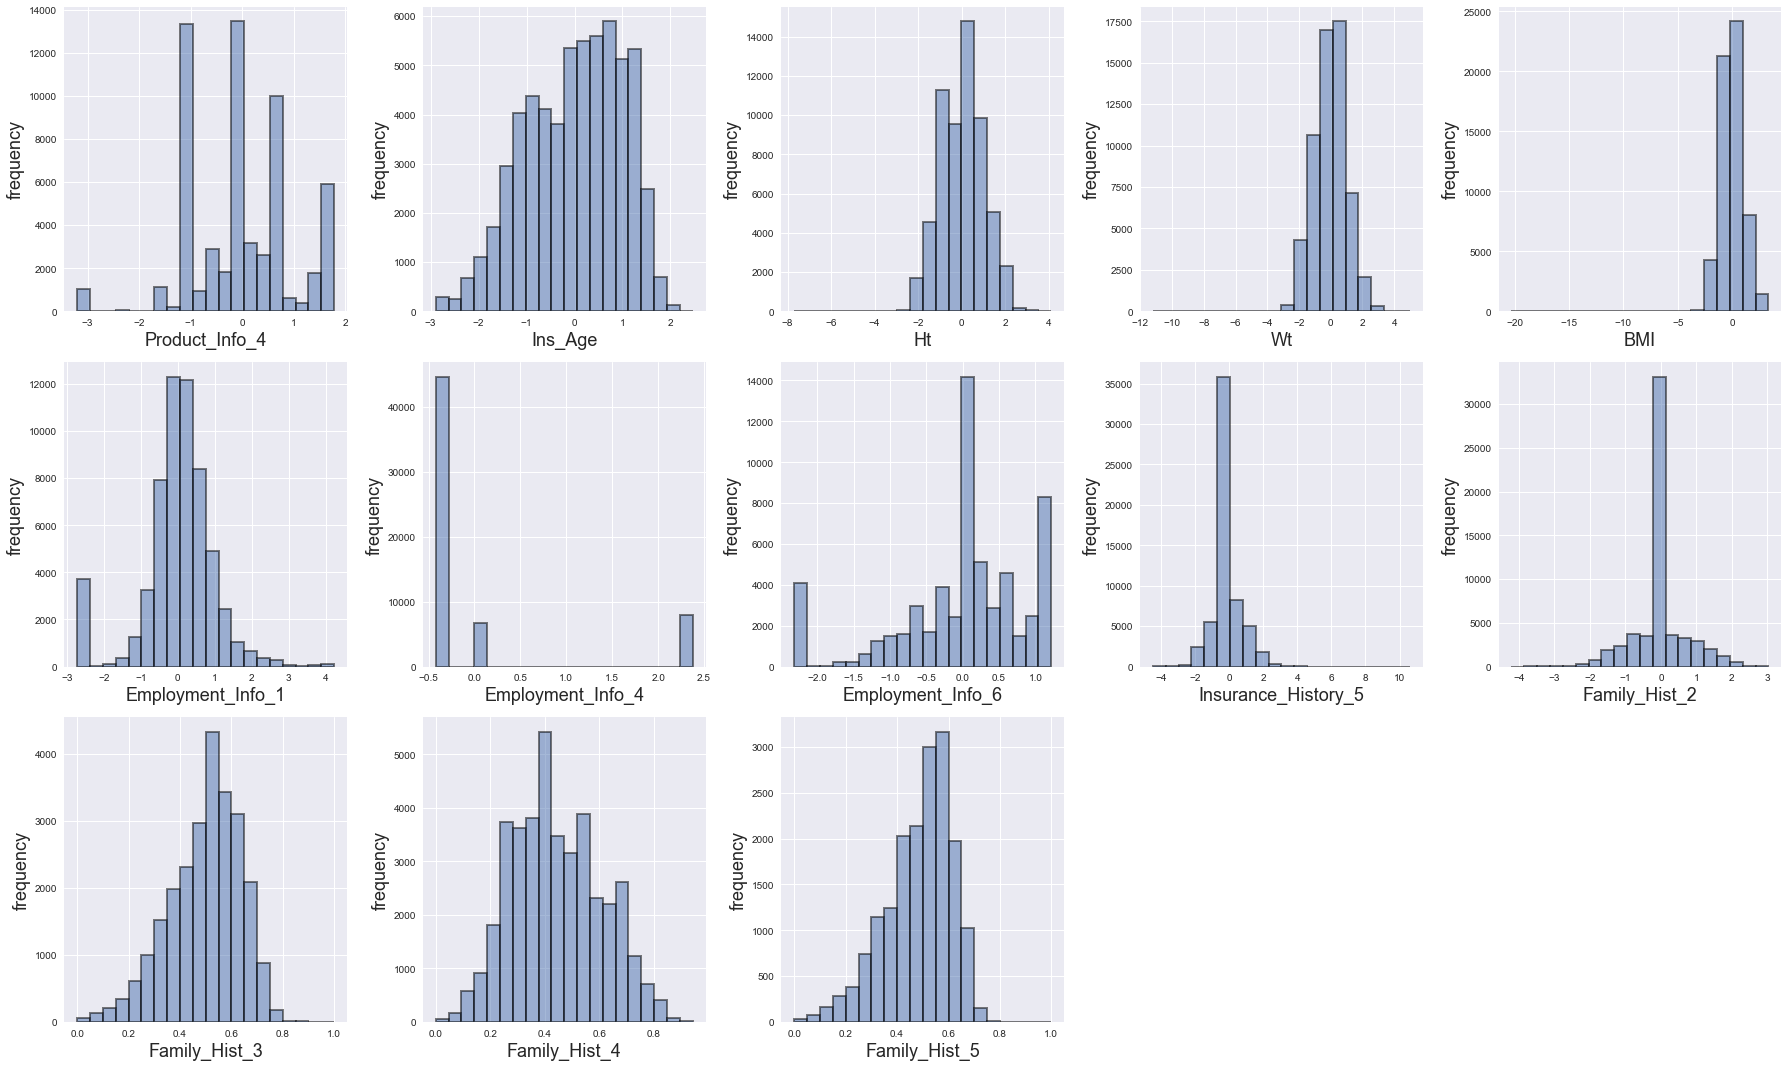

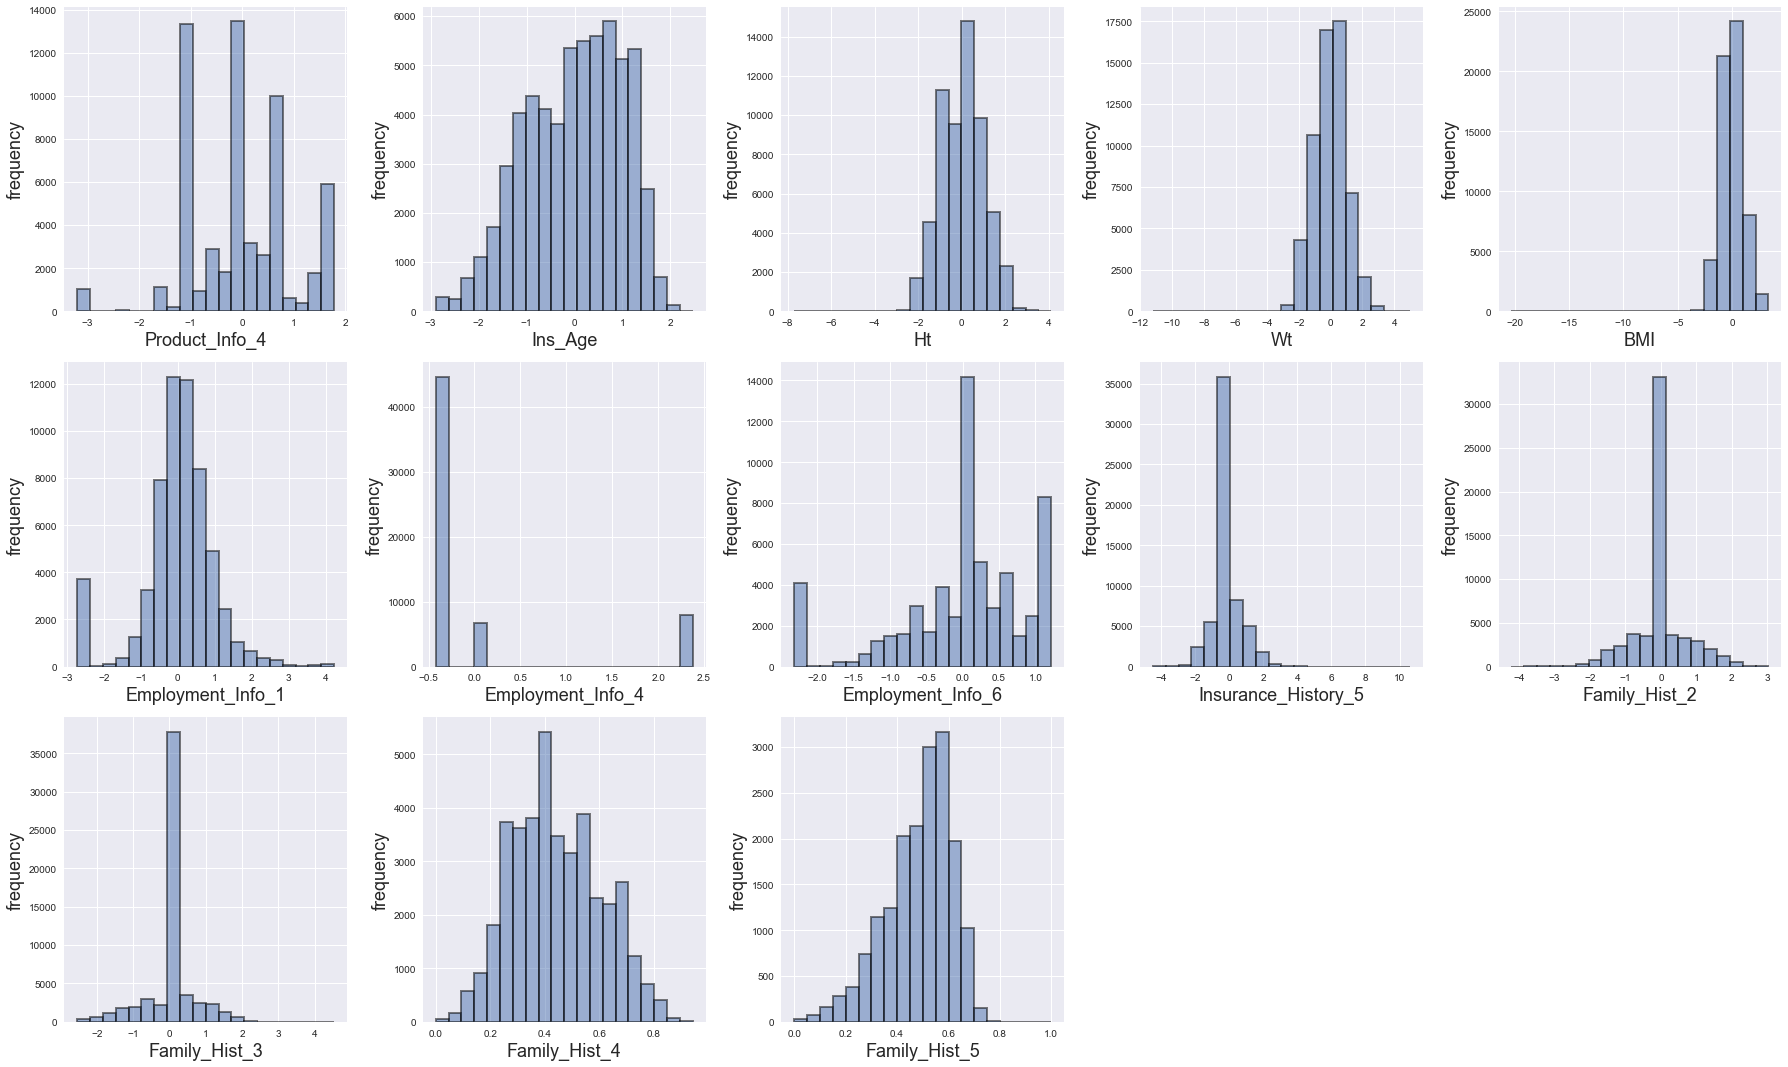

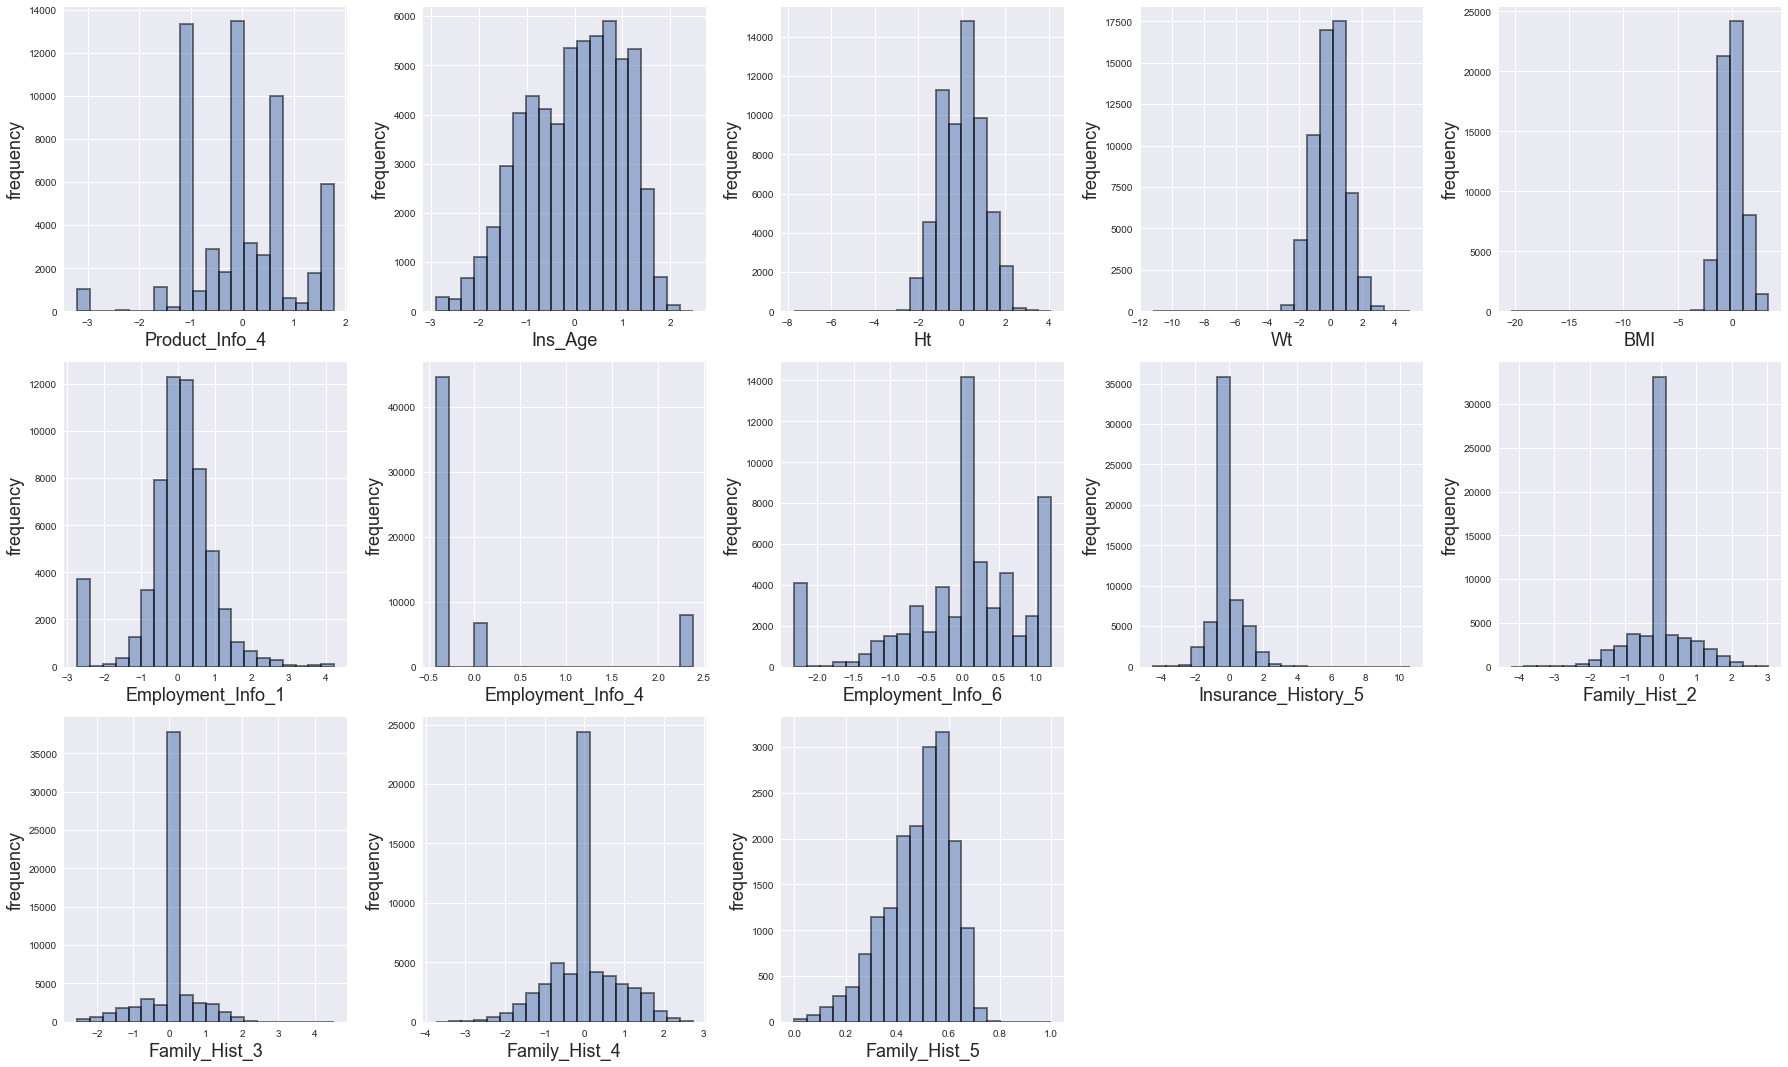

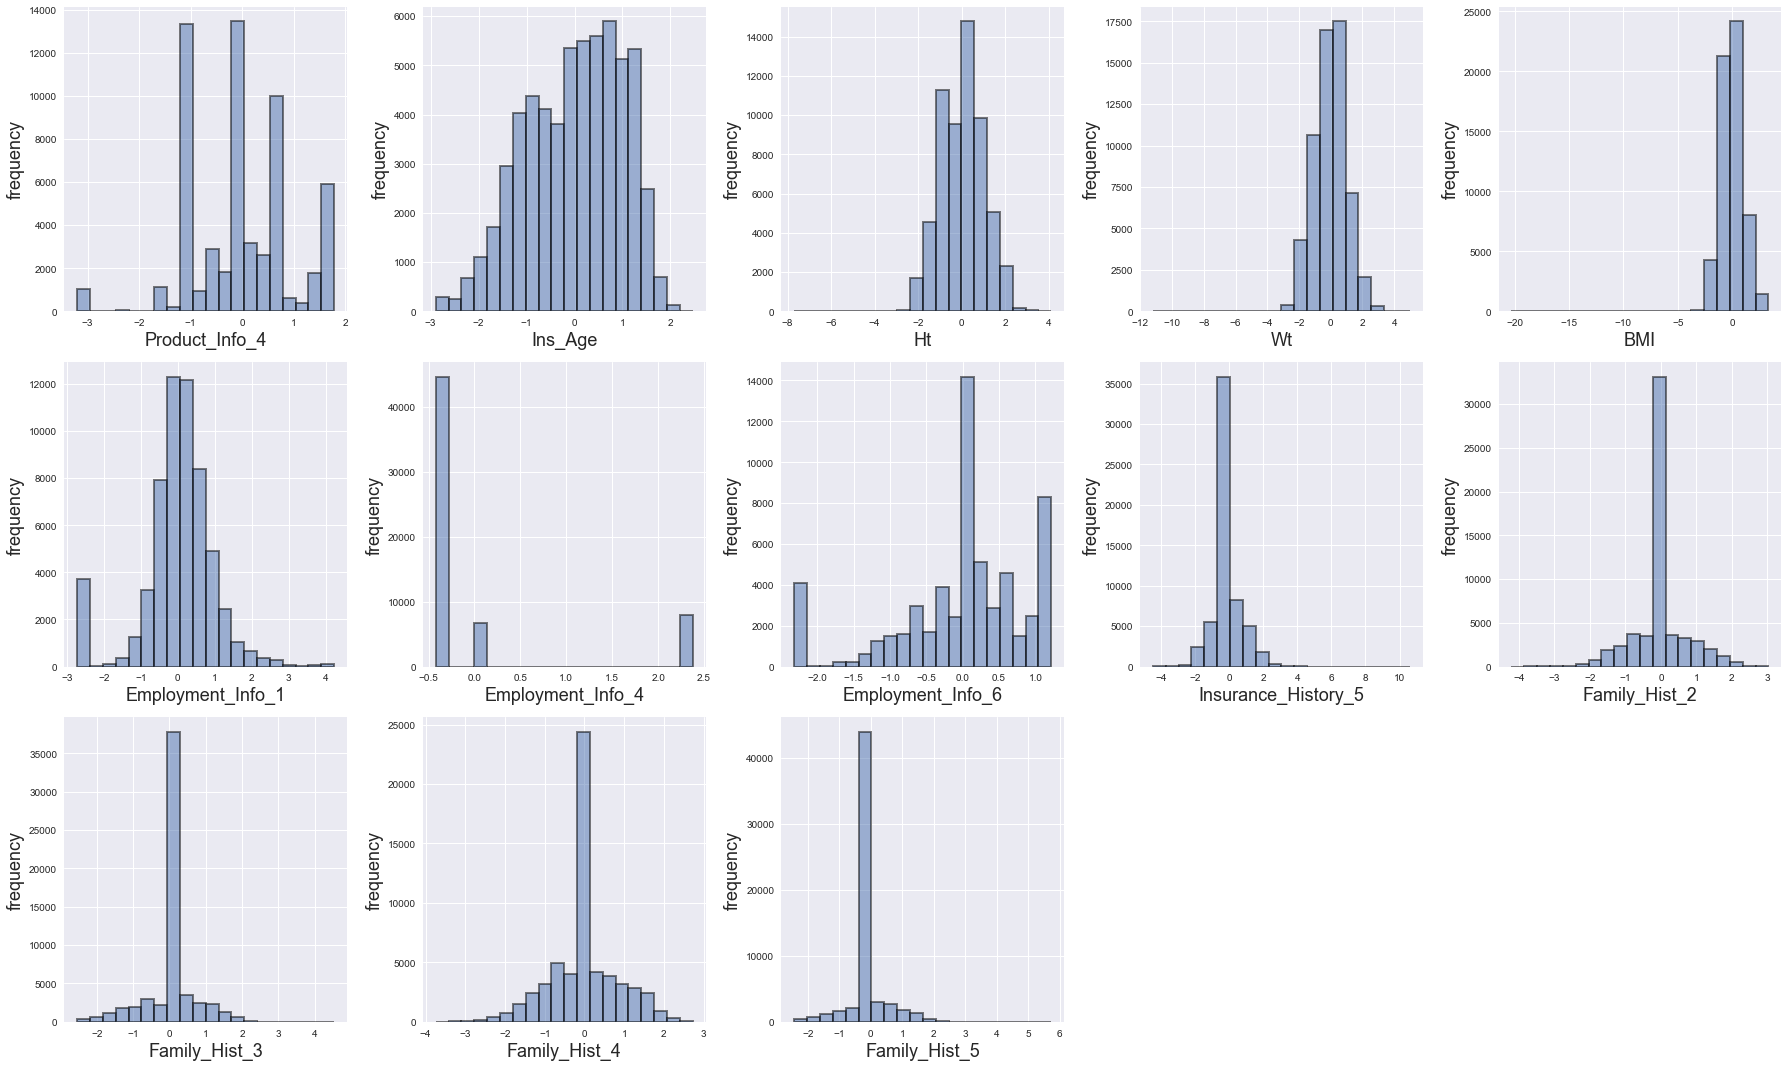

In [11]:
# apply the Box-Cox transformations on the continuous data

"""preprocessing quantitative variable"""
def preproc_quantitatives(X):
    Y = X.copy()

    # apply Box-Cox transformations on non-missing values
    not_missing = Y[~Y.isnull()].copy()
    not_missing = not_missing - np.min(not_missing) + 1e-10  # to avoid errors with non-positive values
    res = stats.boxcox(not_missing)
    Y[~Y.isnull()] = res[0]

    # normalize non-missing values
    mu = np.mean(Y[~Y.isnull()])
    sigma = Y[~Y.isnull()].std()
    Y = (Y - mu) / sigma

    # fill missing values with means
    Y[Y.isnull()] = 0.0

    return Y

# preprocessing continuous_data
for col in continuous_data.columns:
    continuous_data[col] = preproc_quantitatives(continuous_data[col])
    
    plot_histgrams(continuous_data)

# 3.3 Données discrètes

Les 5 colonnes suivantes représentent des données continues:

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

J'ai traité les données discrètes avec la même manière que celle pour les données continues.

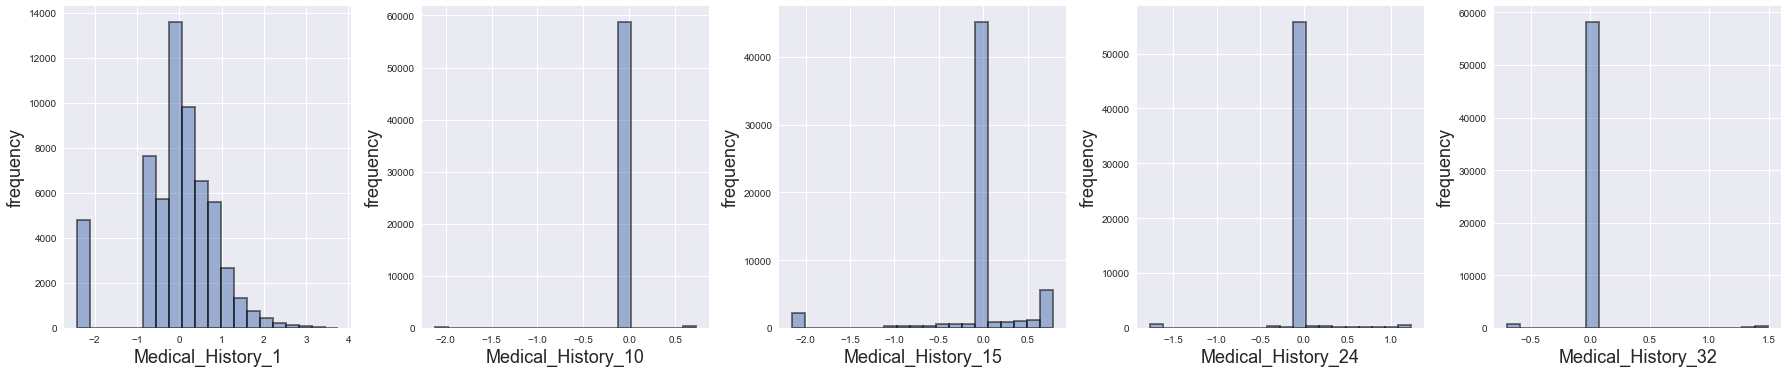

In [12]:
# preprocessing discrete data
for col in discrete_data.columns:
    discrete_data[col] = preproc_quantitatives(discrete_data[col])

# display the discrete data
plot_histgrams(discrete_data)



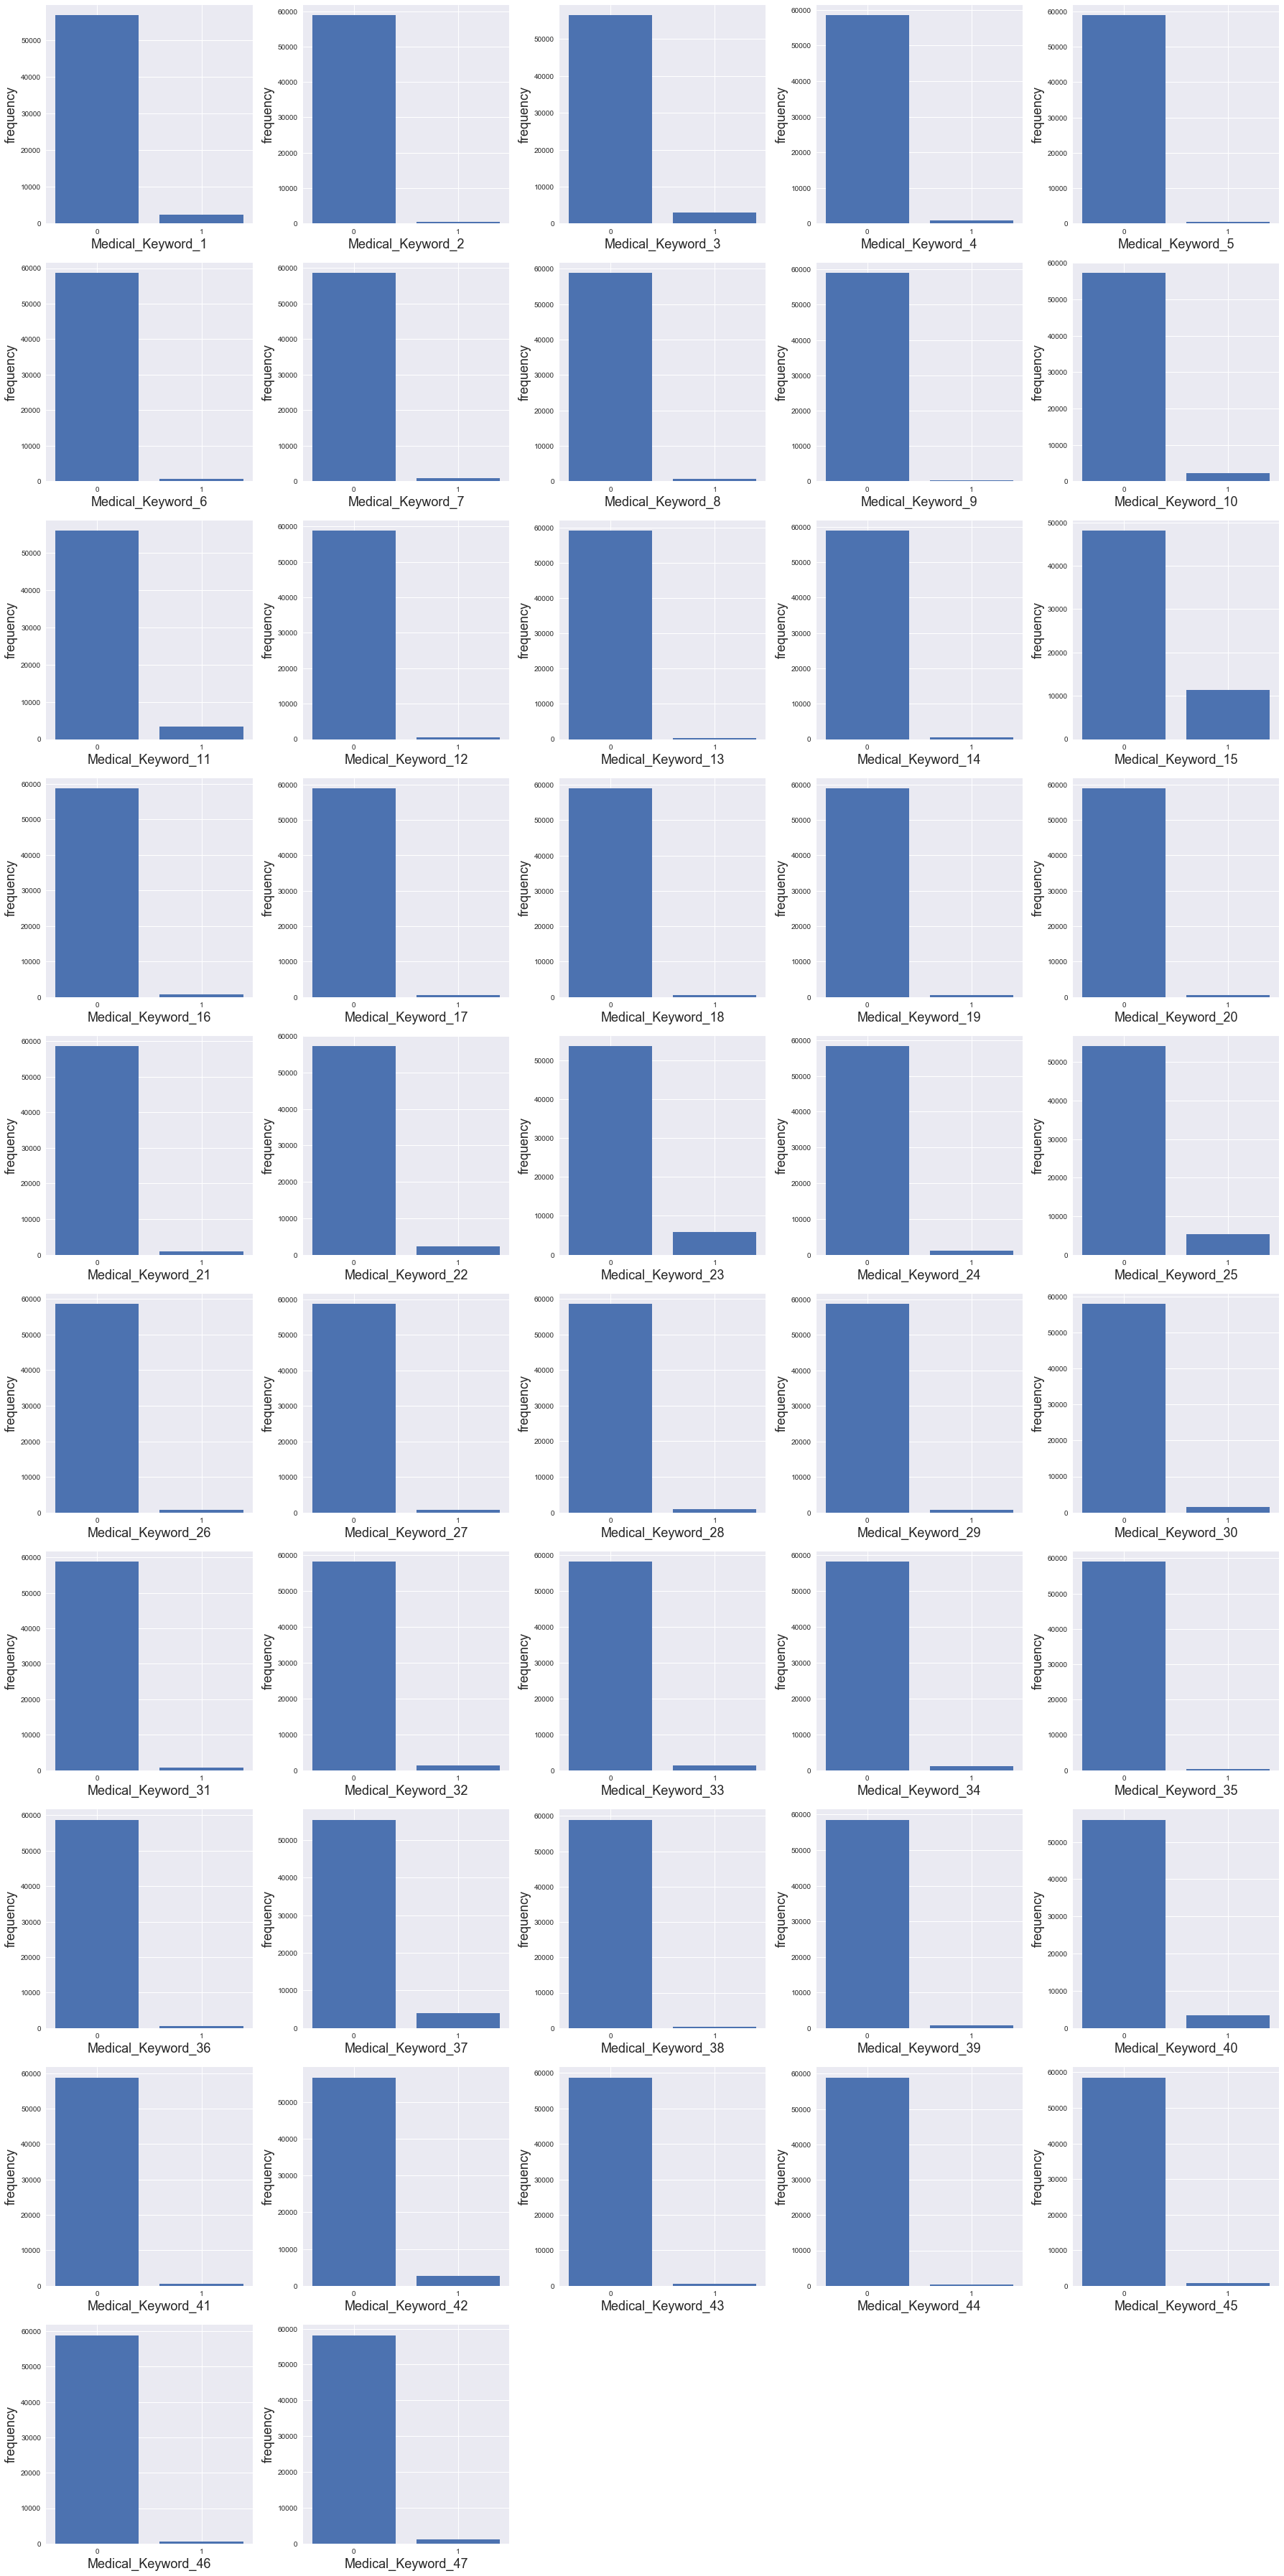

In [13]:
plot_categoricals(dummy_data)

# 4 ) Construction d'un modèle de prédiction
J'ai utilisé des modèles de régression avec pénalisation pour prédire target. 
Avant la prédiction, j'ai fait plusieurs expériences pour juger si toutes les colonnes doivent être utilisées ou non, 
et pour déterminer la valeur de l'hyper-paramètre alpha, en utilisant 40000 lignes pour le train et 10000 lignes pour 
le test, tous deux récupérés à partir de TRAIN_DATA.

<span style="color:red">
Pourquoi ne pas utiliser la fonction scikit learn de split aléatoire ? 
En splittant sur un chiffre particulier vous gardez l'ordre des données telles qu'elles vous sont transmises, qui n'est peut être pas anodin.</span>

<span style="color:red">
Vous ne pouvez pas calculer un sqrt sur une classification, vous devriez vous appuyer sur la fonction score. 
</span>

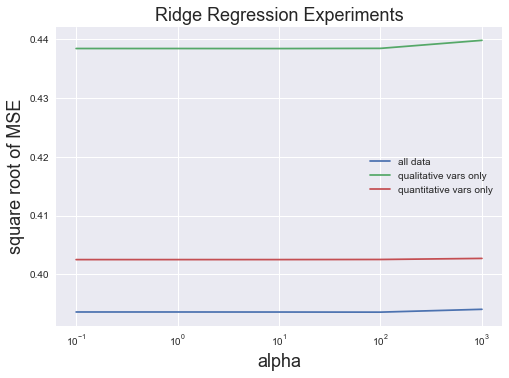

In [14]:
# Ridge Regression for various alpha

configs = {'quantitative vars only' : pd.concat([continuous_data, discrete_data], axis = 1),
           'qualitative vars only' : pd.concat([ dummy_data], axis = 1),
           'all data' : pd.concat([continuous_data, discrete_data, dummy_data], axis = 1)}

errors_dict = {}

y = TRAIN_DATA['target']
for title, X in configs.items():
    X_train = X[:40000]
    X_test = X[40000:50000]
    y_train = y[:40000]
    y_test = y[40000:50000]
    alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
    errors = []

    for alpha in alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        z = model.predict(X_test)
        error = np.sqrt(np.sum((y_test - z) * (y_test - z)) / (1.0 * len(y_test)))
        errors.append(error)
    errors_dict[title] = errors

errors_dict = pd.DataFrame(data=errors_dict)


plt.plot(alphas, errors_dict)
plt.xlabel("alpha", fontsize=18)
plt.ylabel("square root of MSE", fontsize=18)
plt.title('Ridge Regression Experiments', fontsize=18)
plt.legend(errors_dict.columns)
plt.xscale('log')
plt.show()

À partir du graphique ci-dessus qui montre les racines carrées des erreurs quadratiques moyennes (MSE) de plusieurs paramètres, j'ai décidé d'utiliser toutes les colonnes pour prédire la variable cible, et définir alpha = 10,0.

In [23]:
# predict for test data and generate submission

X = pd.concat([continuous_data, discrete_data, dummy_data], axis = 1)
X_train = X[:len(y)]
X_test = X[len(y):]

model = Ridge(alpha=10.0)
model.fit(X_train, y)
z = model.predict(X_test)

z = np.round(z)
z[z < 0.5] = 0
z[z > 0.5] = 1
z = z.astype(np.int64)

df = pd.DataFrame(data={'Id' : TEST_DATA['Id'], 'target' : z})

df.to_csv('submit_ridge_1.csv', index=False)
print(df.head(14))

       Id  target
0   70893       0
1   20997       0
2   29427       1
3   45161       0
4   71802       0
5   15895       1
6   71014       0
7   74730       0
8   52094       0
9   49602       0
10   4887       1
11  16256       0
12  13928       0
13  54195       0


<span style="color:red">
Ne mettez pas des noms de dossiers en dur dans vos codes
</span>

In [15]:
test = pd.read_csv('C:/Users/moi/Downloads/master esilv/Python/test.csv')
train = pd.read_csv('C:/Users/moi/Downloads/master esilv/Python/train.csv')
#train.columns.values

In [16]:
print('proportion of nan values in train set : ')
print(train.isnull().sum(axis = 0).sort_values(ascending = False).head(14)/len(train))
print('\n')
print('proportion of nan values in test set : ')
print(test.isnull().sum(axis = 0).sort_values(ascending = False).head(14)/len(train))

proportion of nan values in train set : 
Medical_History_10     0.990639
Medical_History_32     0.981550
Medical_History_24     0.936105
Medical_History_15     0.750589
Family_Hist_5          0.705105
Family_Hist_3          0.577373
Family_Hist_2          0.482377
Insurance_History_5    0.426325
Family_Hist_4          0.322551
Employment_Info_6      0.183336
Medical_History_1      0.150133
Employment_Info_4      0.114556
Employment_Info_1      0.000350
Medical_History_7      0.000000
dtype: float64


proportion of nan values in test set : 
Medical_History_10     0.154220
Medical_History_32     0.152605
Medical_History_24     0.145618
Medical_History_15     0.117359
Family_Hist_5          0.108639
Family_Hist_3          0.089041
Family_Hist_2          0.075339
Insurance_History_5    0.067943
Family_Hist_4          0.050816
Employment_Info_6      0.027909
Medical_History_1      0.022868
Employment_Info_4      0.017380
Employment_Info_1      0.000019
Medical_History_13     0.000000
dtype:

# 3) Analyser les données
Séparation Product_Info_2 

IMC * INs_Age

compter  NA par Colonnes

Compter les mots clés médicaux par ligne 

remplacer les valeurs manquantes avec la moyenne

In [17]:
def parse_data(X):
    
    X['BMI_Ins_age'] = X.BMI*X.Ins_Age
    
    X['Product_Info2_let'] =X.Product_Info_2.str[0]
    X['Product_Info2_num'] = X.Product_Info_2.str[1]
    
    X['Product_Info2_let'] = pd.factorize(X.Product_Info2_let)[0]+1
    X['Product_Info_2'] = pd.factorize(X.Product_Info_2)[0]+1
    
    X['Medical_KW'] = X[['Medical_Keyword_1',
       'Medical_Keyword_2', 'Medical_Keyword_3', 'Medical_Keyword_4',
       'Medical_Keyword_5', 'Medical_Keyword_6', 'Medical_Keyword_7',
       'Medical_Keyword_8', 'Medical_Keyword_9', 'Medical_Keyword_10',
       'Medical_Keyword_11', 'Medical_Keyword_12', 'Medical_Keyword_13',
       'Medical_Keyword_14', 'Medical_Keyword_15', 'Medical_Keyword_16',
       'Medical_Keyword_17', 'Medical_Keyword_18', 'Medical_Keyword_19',
       'Medical_Keyword_20', 'Medical_Keyword_21', 'Medical_Keyword_22',
       'Medical_Keyword_23', 'Medical_Keyword_24', 'Medical_Keyword_25',
       'Medical_Keyword_26', 'Medical_Keyword_27', 'Medical_Keyword_28',
       'Medical_Keyword_29', 'Medical_Keyword_30', 'Medical_Keyword_31',
       'Medical_Keyword_32', 'Medical_Keyword_33', 'Medical_Keyword_34',
       'Medical_Keyword_35', 'Medical_Keyword_36', 'Medical_Keyword_37',
       'Medical_Keyword_38', 'Medical_Keyword_39', 'Medical_Keyword_40',
       'Medical_Keyword_41', 'Medical_Keyword_42', 'Medical_Keyword_43',
       'Medical_Keyword_44', 'Medical_Keyword_45', 'Medical_Keyword_46',
       'Medical_Keyword_47', 'Medical_Keyword_48']].sum(axis = 1)
    
    X['Na_Num'] = X.isnull().sum(axis = 1)



    
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    col = X.columns.values    
    X = pd.DataFrame(imp.fit_transform(X))
    X.columns = col
    

    return X

In [18]:
X = parse_data(train)
y = X.target

In [19]:
columns_to_drop = ['Id', 'target']

from sklearn.ensemble import ExtraTreesClassifier
rf = ExtraTreesClassifier(n_estimators=300,
                              random_state=0)
rf.fit(X.drop(columns_to_drop, axis = 1), y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

#Afficher les 20 premiéres features par importance

In [20]:
importances =pd.DataFrame({'features' :X.drop(columns_to_drop, axis = 1).columns,
                           'importances' : rf.feature_importances_})
importances.sort_values(by = 'importances', ascending = False).head(20)

,features,importances
11,BMI,0.082327
10,Wt,0.060757
41,Medical_History_4,0.047819
60,Medical_History_23,0.047548
127,BMI_Ins_age,0.038161
93,Medical_Keyword_15,0.038075
52,Medical_History_15,0.027485
4,Product_Info_4,0.027201
8,Ins_Age,0.023945
23,InsuredInfo_6,0.021192


#Afficher les 20 dernières features

In [21]:
importances.sort_values(by = 'importances', ascending = False).tail(20)

,features,importances
114,Medical_Keyword_36,0.000851
83,Medical_Keyword_5,0.000833
48,Medical_History_11,0.000797
109,Medical_Keyword_31,0.000793
80,Medical_Keyword_2,0.000786
113,Medical_Keyword_35,0.000755
92,Medical_Keyword_14,0.000752
116,Medical_Keyword_38,0.000719
87,Medical_Keyword_9,0.000715
122,Medical_Keyword_44,0.000713


#Plot the features importances

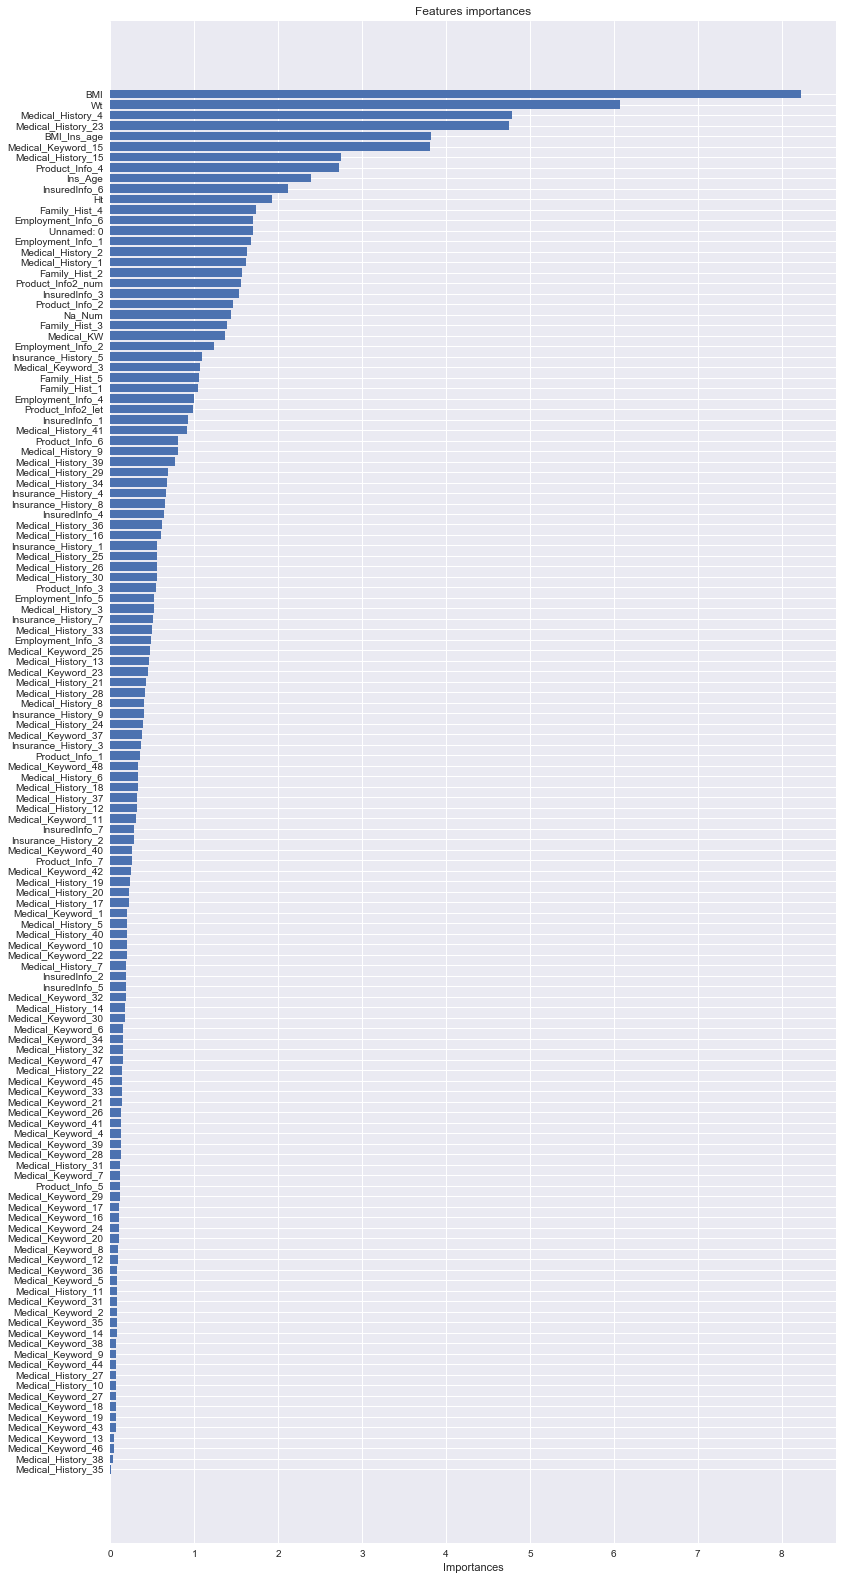

In [22]:
#plot importances

import matplotlib.pyplot as plt
%matplotlib inline

importances.sort_values(by = 'importances', ascending = True, inplace = True)
val = importances.importances*100    # the bar lengths
pos = np.arange(importances.shape[0])+.5 

plt.figure(figsize = (13,28))
plt.barh(pos,val, align='center')
plt.yticks(pos, importances.features.values)
plt.xlabel('Importances')
plt.title('Features importances')
plt.grid(True)


<span style="color:red">
Il serait intéressant de visualiser les features importantes contre la target.
</span>